In [14]:
import pandas as pd # for reading and intreacting with dataframes 
import seaborn as sns #for advanced graphs 
import matplotlib.pyplot as plt  #for plotting graphs
import os #for interacting with system hardware
import numpy as np #for handling arrays

import json # to read configuration files
plt.style.use('seaborn') #use the style provided in seaborn library

C:\Users\kulpr\AppData\Local\Temp\ipykernel_31280\2689337665.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') #use the style provided in seaborn library


In [15]:
# state list 
STATES = ['TX', 'CA', 'VA', 'NC', 'CO', 'FL', 'MA', 'MD']
# for plotting 
PIE_NROWS = 2
PIE_NCOLS = 2
NUMERICAL_NROWS = 2
NUMERICAL_NCOLS = 2
REGULAR_FIGSIZE = (16,6)
PIE_FIGSIZE=(20,15)
MULTICOL_FIGSIZE=(16,8)
# for saving plots 
AFFORDABILITY_PLOT_DESTINATION = 'static/Affordability/'
OTHER_PLOT_DESTINATION = 'static/Other/'
NUMERICAL_PLOT_DESTINATION = 'static/Numerical/'
SPACIOUS_PLOT_DESTINATION = 'static/Spacious/'
OVERALL_NUMERICAL_ANALYSIS_PATH = 'static/Overall'
PREPROCESSED_FILE_PATH = 'preprocessed/'

In [16]:
# Fetch the data and store in the dictionary 
df_dict = dict(zip(STATES, [pd.read_csv(os.path.join(PREPROCESSED_FILE_PATH,f'{state}_viz.csv')) for state in STATES]))

In [17]:

for state, df in df_dict.items():
   # create a state column for all dataframes for identification while combining 
   
    df['state'] = state
    df['affordability'] = df['square_feet']/df['price']
    df['cityname'] = df['cityname'].str.upper()
    cols = df.columns
    cols = cols.str.upper()
    df.columns = cols

In [18]:
combined = pd.concat(df_dict.values())

In [19]:
combined.columns

Index(['CATEGORY', 'BATHROOMS', 'BEDROOMS', 'FEE', 'PETS_ALLOWED', 'PRICE',
       'SQUARE_FEET', 'CITYNAME', 'WITH_STORAGE', 'WITH_PARKING', 'WITH_GYM',
       'WITH_POOL', 'WITH_WOODFLOORS', 'WITH_PATIO', 'WITH_CLUBHOUSE',
       'WITH_INTERNET', 'WITH_GATED', 'ECONOMIC_REGION', 'STATE',
       'AFFORDABILITY'],
      dtype='object')

In [20]:
combined.head()

,CATEGORY,BATHROOMS,BEDROOMS,FEE,PETS_ALLOWED,PRICE,SQUARE_FEET,CITYNAME,WITH_STORAGE,WITH_PARKING,WITH_GYM,WITH_POOL,WITH_WOODFLOORS,WITH_PATIO,WITH_CLUBHOUSE,WITH_INTERNET,WITH_GATED,ECONOMIC_REGION,STATE,AFFORDABILITY
0,apartment,1.0,1.0,No,both cats and dogs,729.0,800,SAN ANTONIO,False,False,False,False,False,False,False,False,False,Southwest,TX,1.097394
1,apartment,1.0,1.0,No,no pets,1060.0,650,AUSTIN,True,True,True,True,True,False,False,False,False,Southwest,TX,0.613208
2,apartment,1.0,1.0,No,no pets,1003.0,797,ROUND ROCK,False,False,False,True,False,False,False,False,True,Southwest,TX,0.794616
3,apartment,1.0,1.0,No,no pets,837.0,444,AUSTIN,False,True,False,True,False,False,False,False,False,Southwest,TX,0.530466
4,apartment,1.0,1.0,No,no pets,1020.0,692,AUSTIN,False,True,False,True,False,False,False,False,False,Southwest,TX,0.678431


## Economic Region Level distribution

In [21]:
# create a list of columns to be analyszed numerically for all cities
overall_numerical_cols = ['PRICE','SQUARE_FEET','AFFORDABILITY']

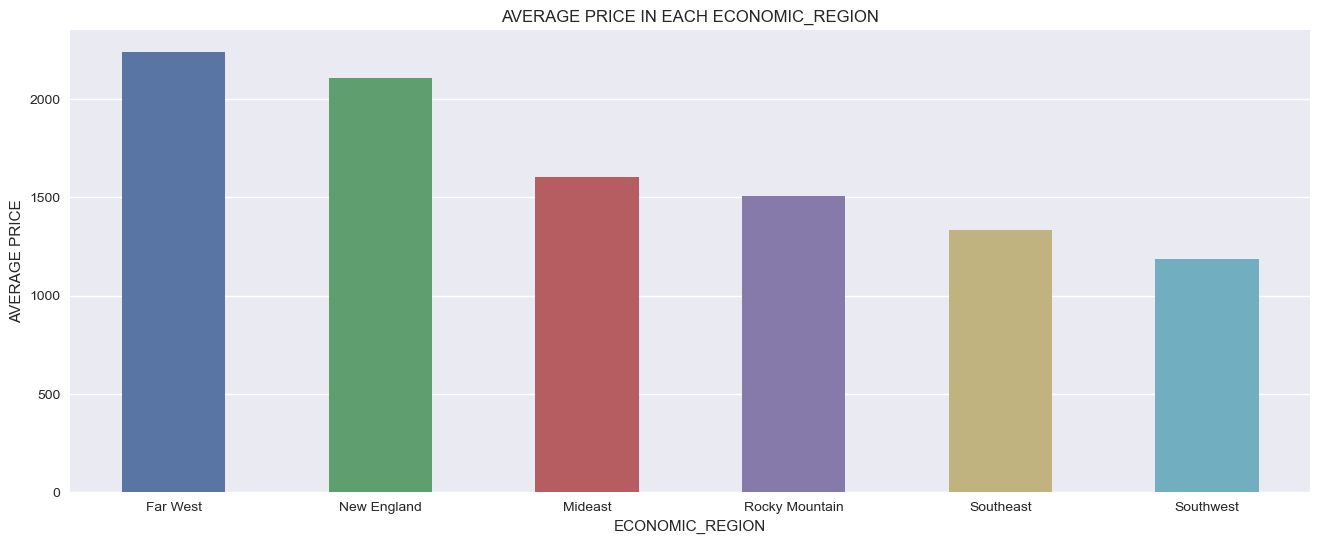

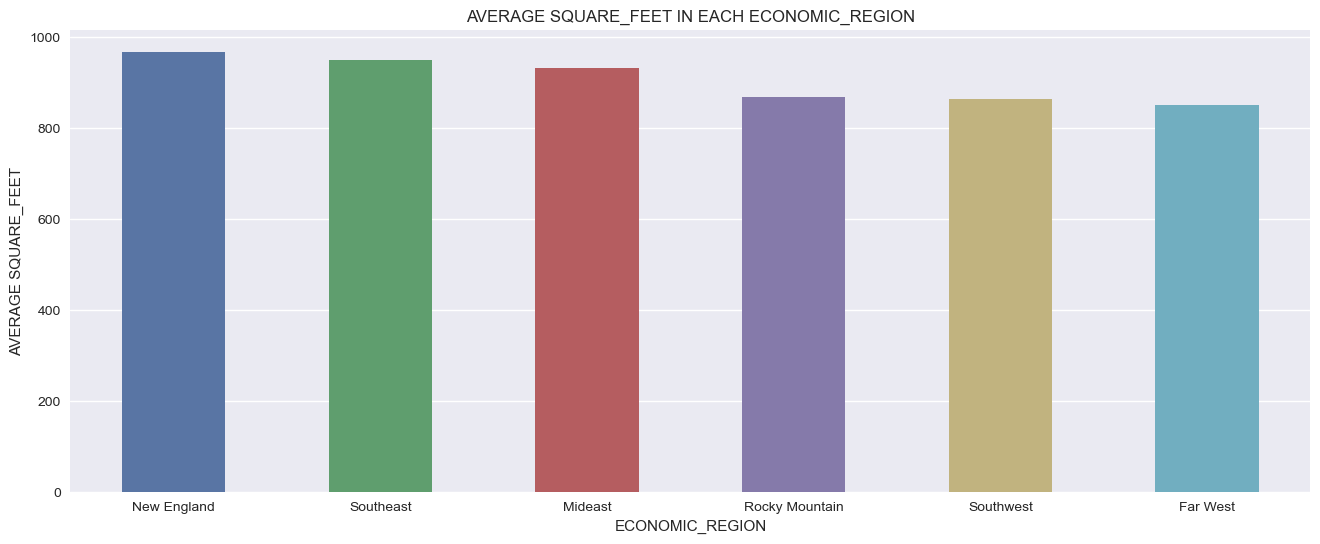

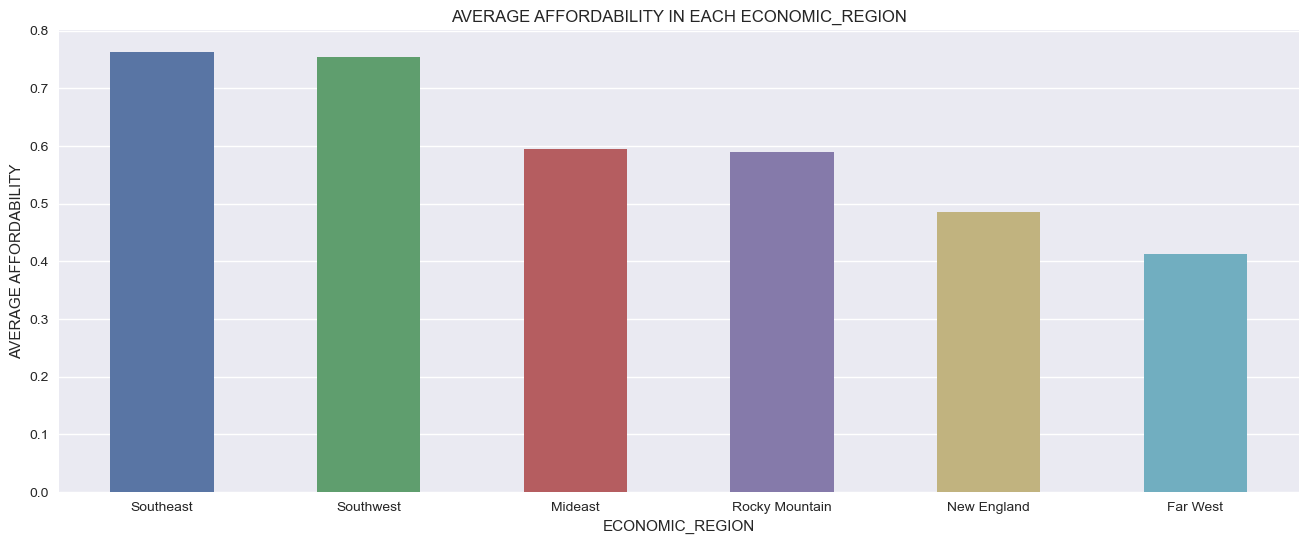

In [22]:
for col in overall_numerical_cols:
    fig, ax = plt.subplots(figsize=REGULAR_FIGSIZE)
    mean_df = combined.groupby(by=['ECONOMIC_REGION'])[col].mean()
    mean_df.sort_values(inplace=True,ascending=False)
    sns.barplot(x=mean_df.index, y=mean_df, ax=ax, width=0.5)
    ax.set_xlabel('ECONOMIC_REGION')
    ax.set_ylabel(f'AVERAGE {col}')
    ax.set_title(f'AVERAGE {col} IN EACH ECONOMIC_REGION')
    if not os.path.exists(OVERALL_NUMERICAL_ANALYSIS_PATH):
        os.makedirs(OVERALL_NUMERICAL_ANALYSIS_PATH)
    plt.savefig(os.path.join(OVERALL_NUMERICAL_ANALYSIS_PATH, f'{col}.png'))
    plt.show()

# State level distribution

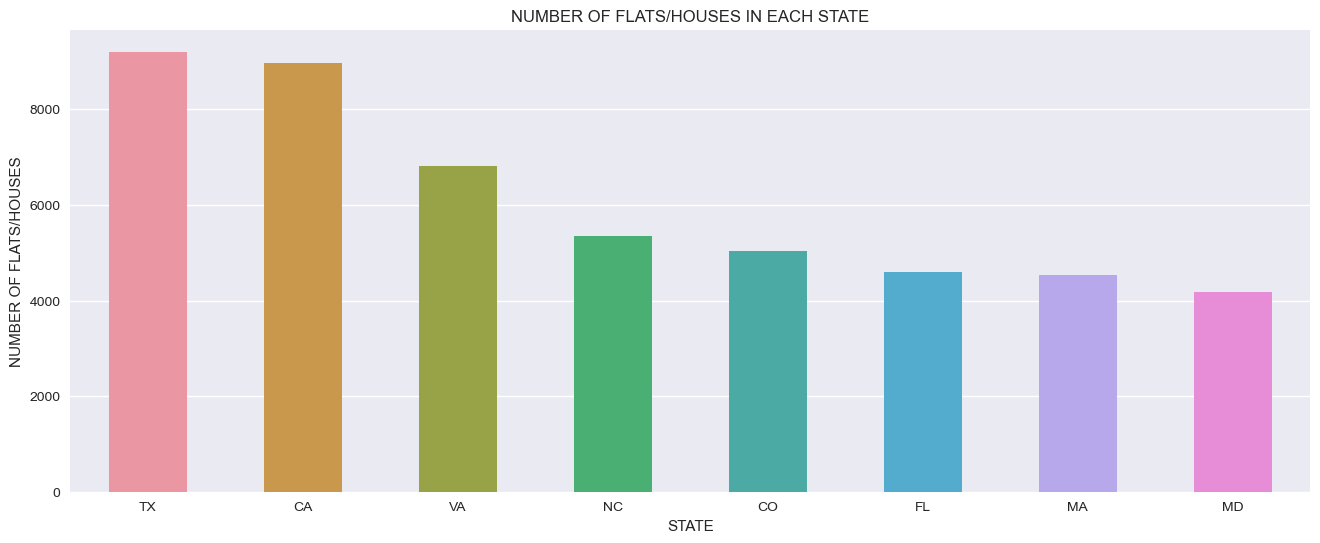

In [23]:
fig, ax = plt.subplots(figsize=REGULAR_FIGSIZE)
sns.countplot(x=combined['STATE'],ax=ax,order=combined['STATE'].value_counts().index, width=0.5)
ax.set_title('NUMBER OF FLATS/HOUSES IN EACH STATE')
ax.set_xlabel('STATE')
ax.set_ylabel('NUMBER OF FLATS/HOUSES')
if not os.path.exists(OVERALL_NUMERICAL_ANALYSIS_PATH):
    os.makedirs(OVERALL_NUMERICAL_ANALYSIS_PATH)
plt.savefig(os.path.join(OVERALL_NUMERICAL_ANALYSIS_PATH,f'{col}.png'))
plt.show()



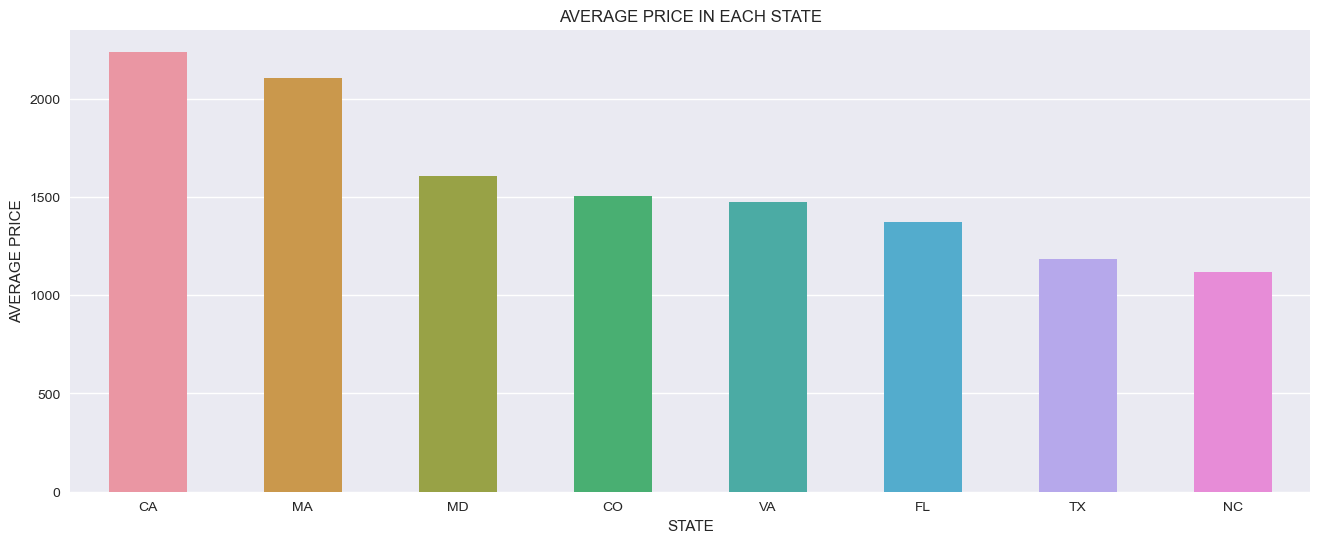

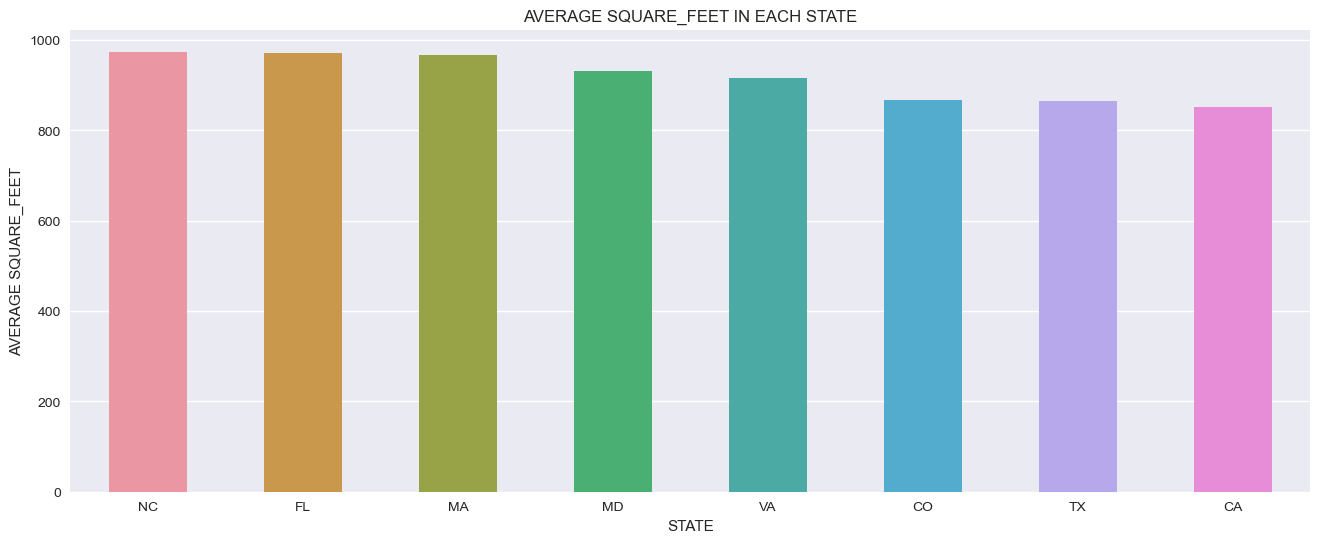

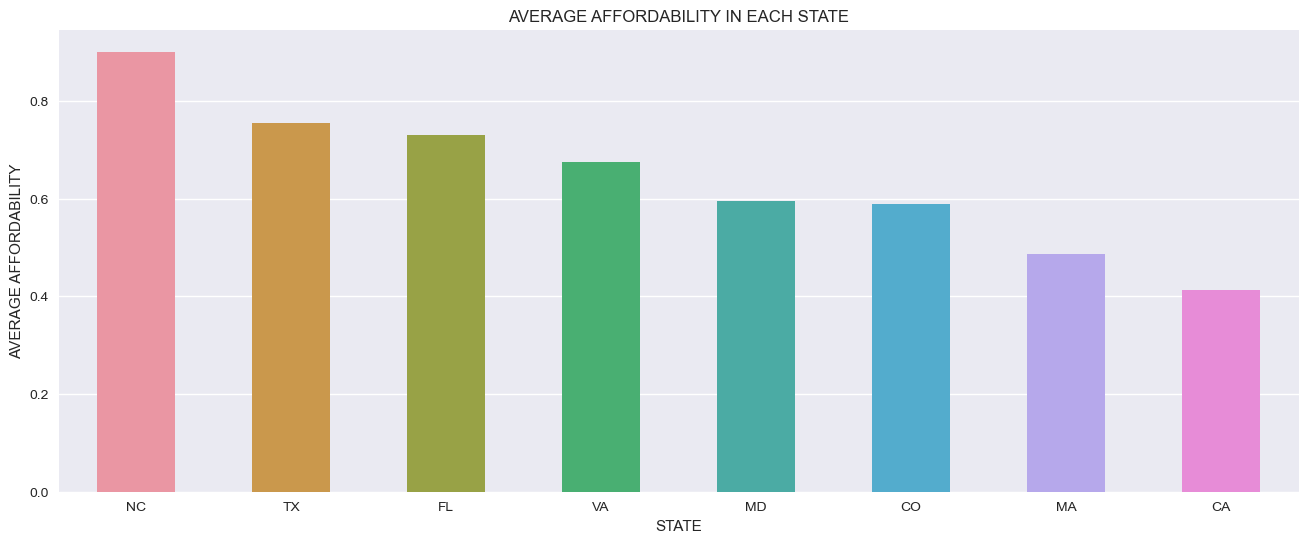

In [24]:
for col in overall_numerical_cols:
    fig, ax = plt.subplots(figsize=REGULAR_FIGSIZE)
    mean_df = combined.groupby(by=['STATE'])[col].mean()
    mean_df.sort_values(inplace=True,ascending=False)
    sns.barplot(x=mean_df.index, y=mean_df, ax=ax, width=0.5)
    ax.set_xlabel('STATE')
    ax.set_ylabel(f'AVERAGE {col}')
    ax.set_title(f'AVERAGE {col} IN EACH STATE')
    plt.savefig(os.path.join(OVERALL_NUMERICAL_ANALYSIS_PATH, f'{col}_num.png'))
    plt.show()

# Distribution of important features like price, square feet, bedrooms, bathrooms

In [25]:
# create an array for analyzing numerical columns 
numerical_cols = np.array([
    ['PRICE','SQUARE_FEET'],
    ['BEDROOMS','BATHROOMS']
]).reshape(NUMERICAL_NROWS,NUMERICAL_NCOLS)

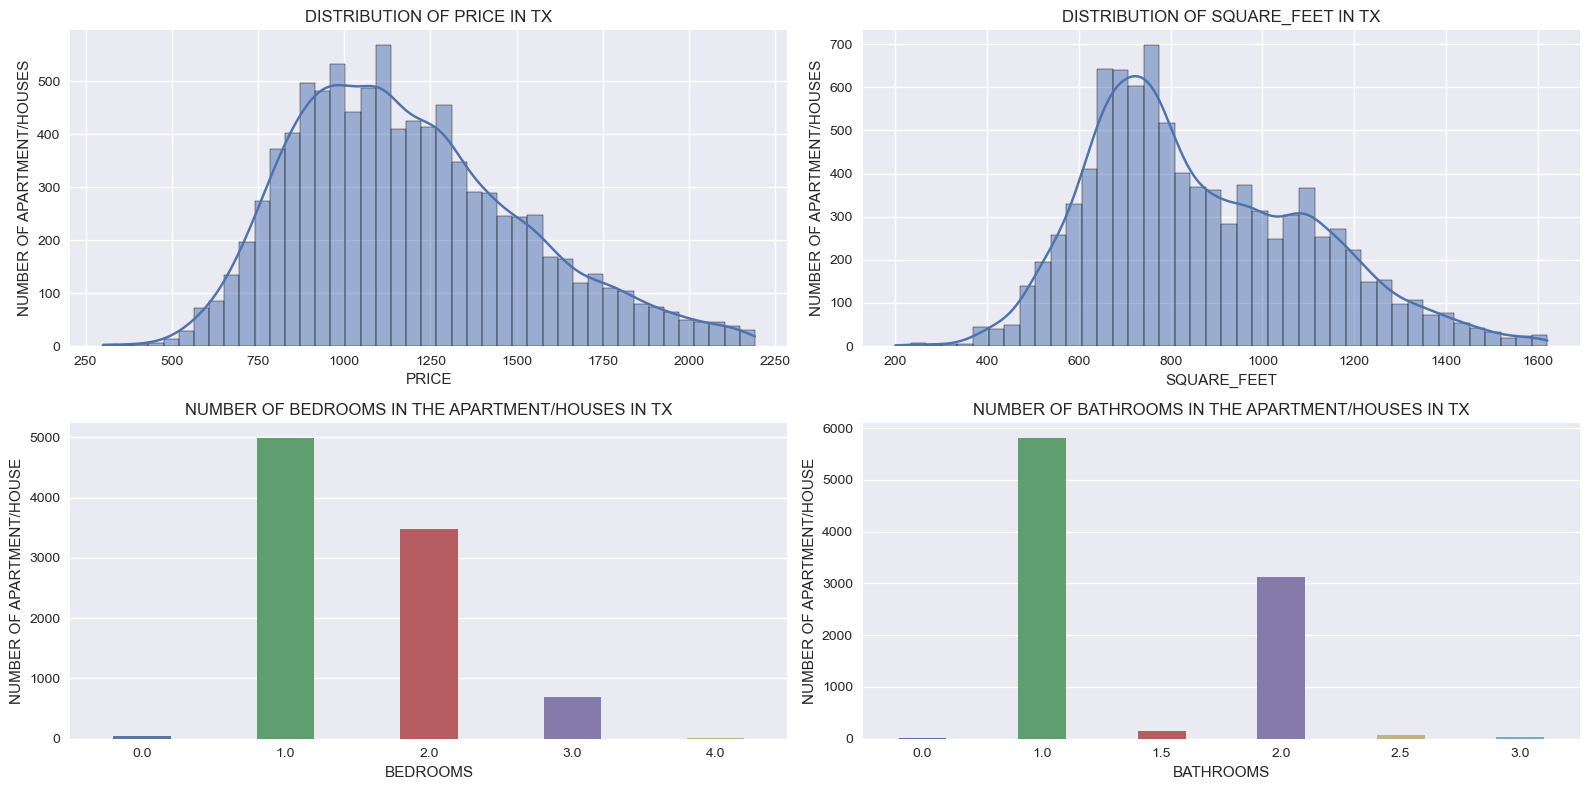

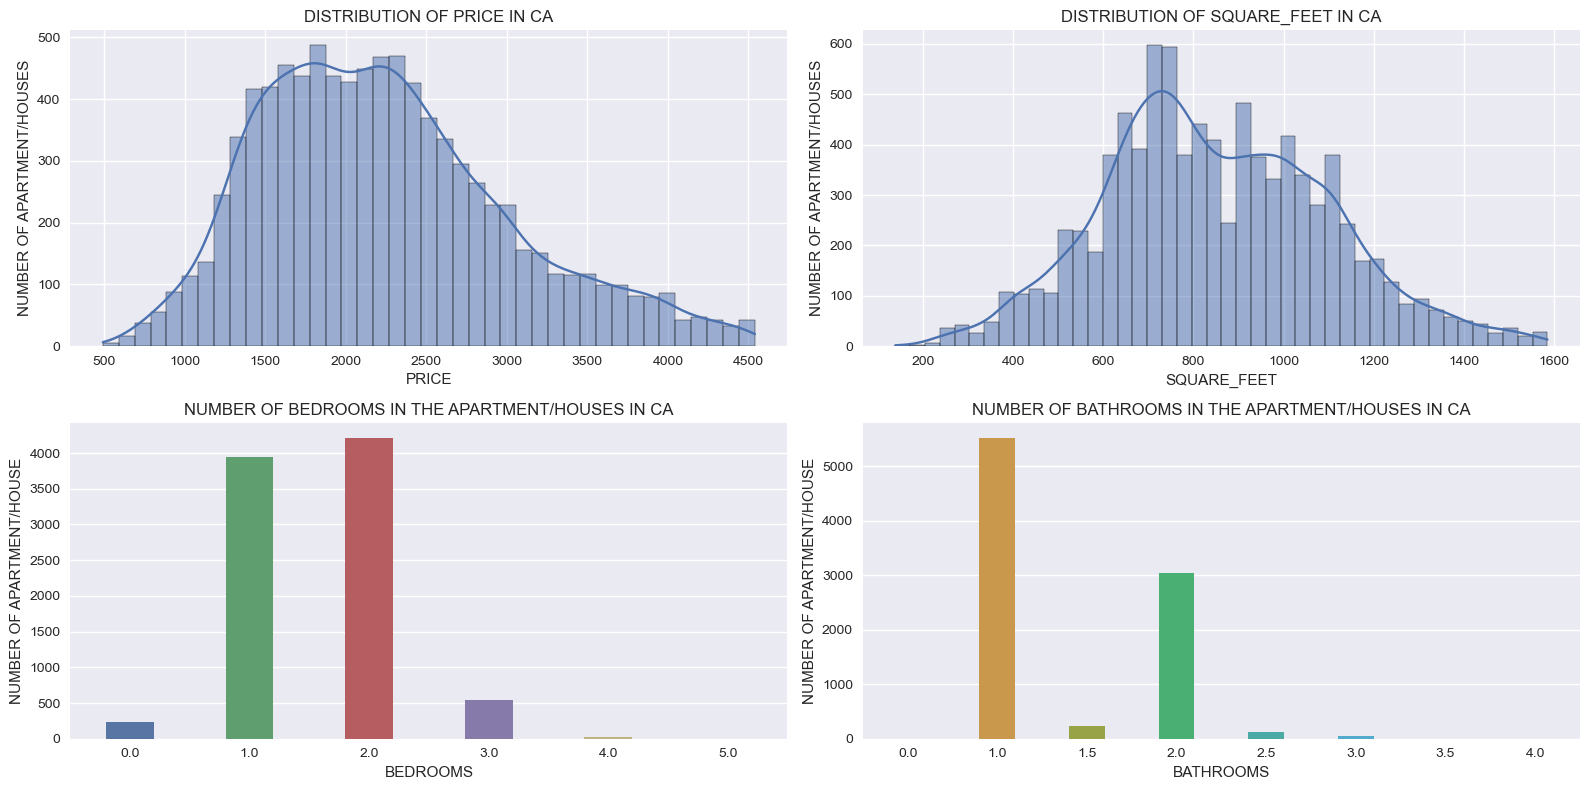

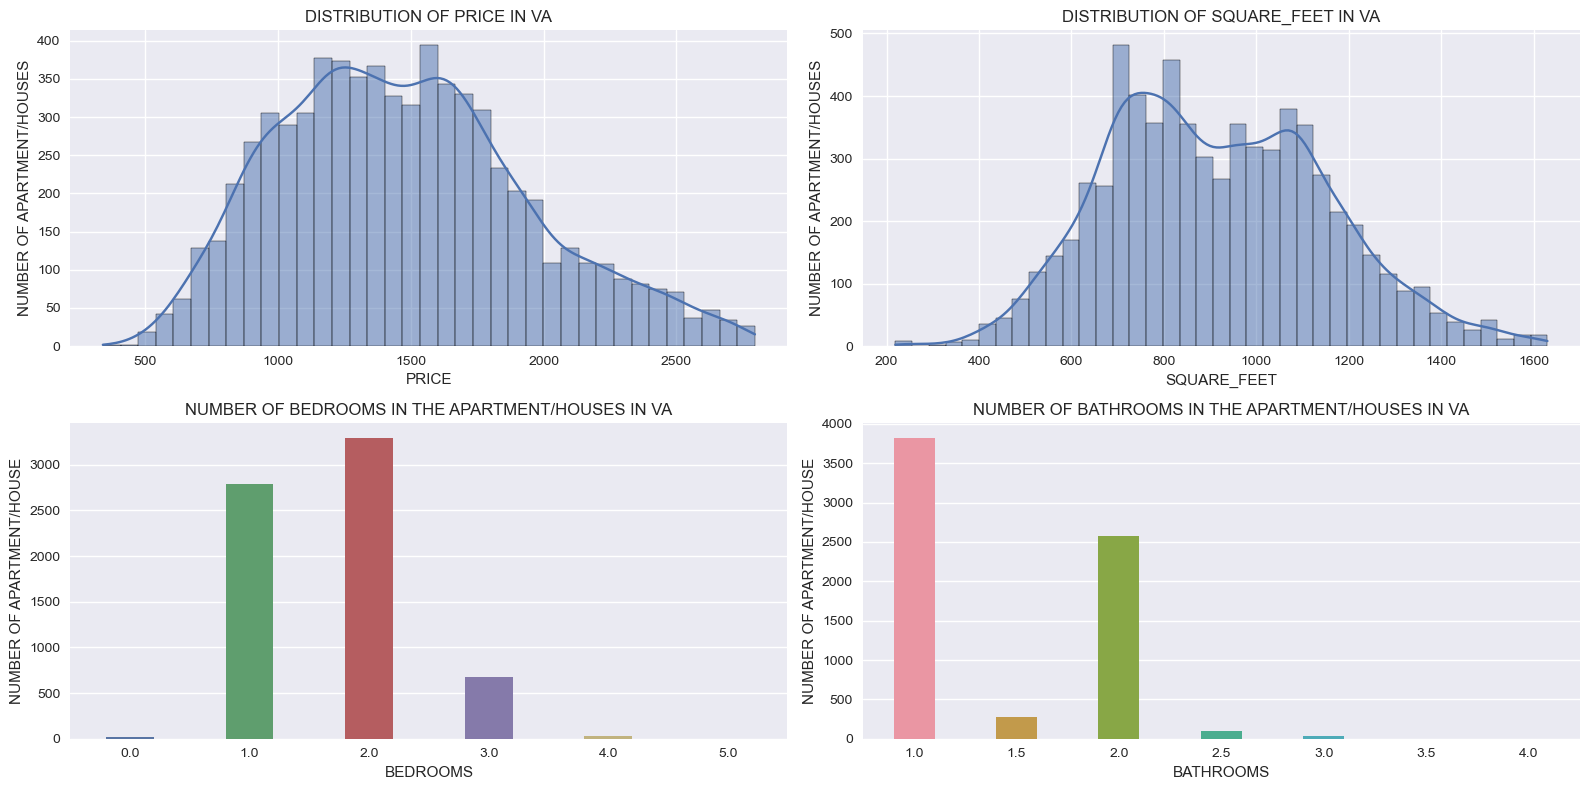

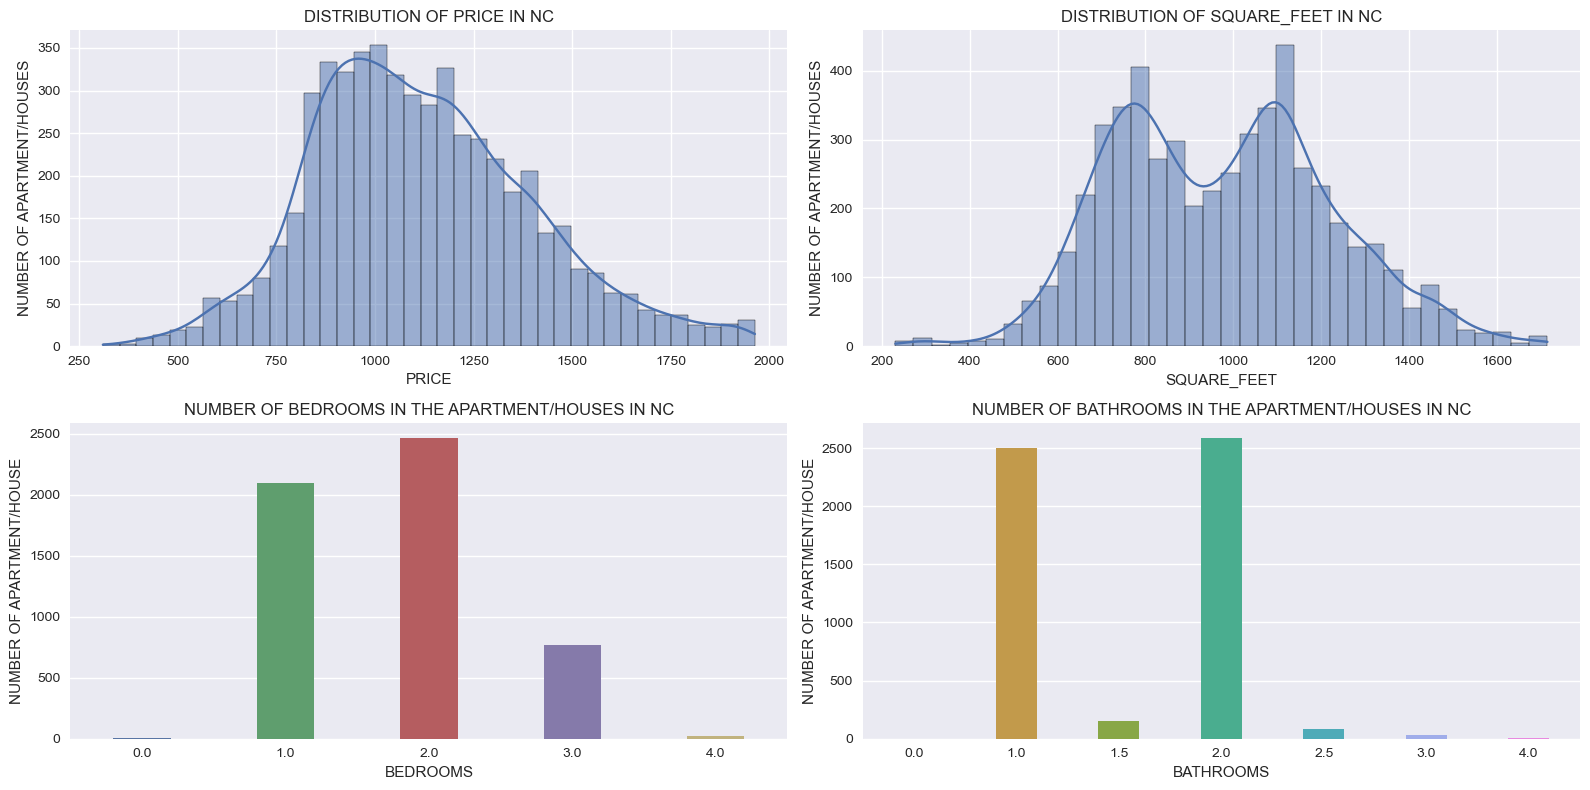

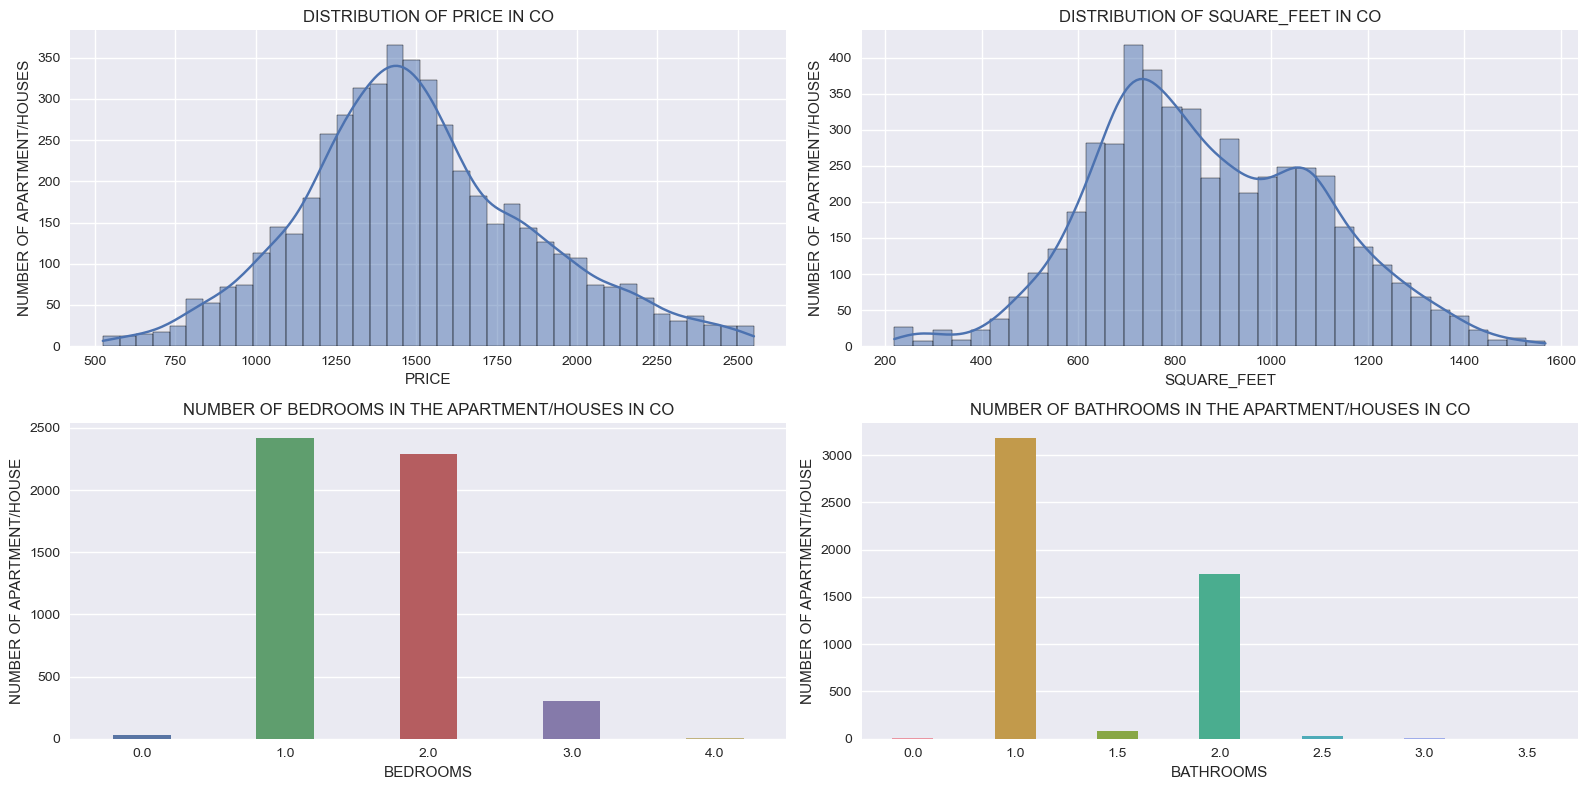

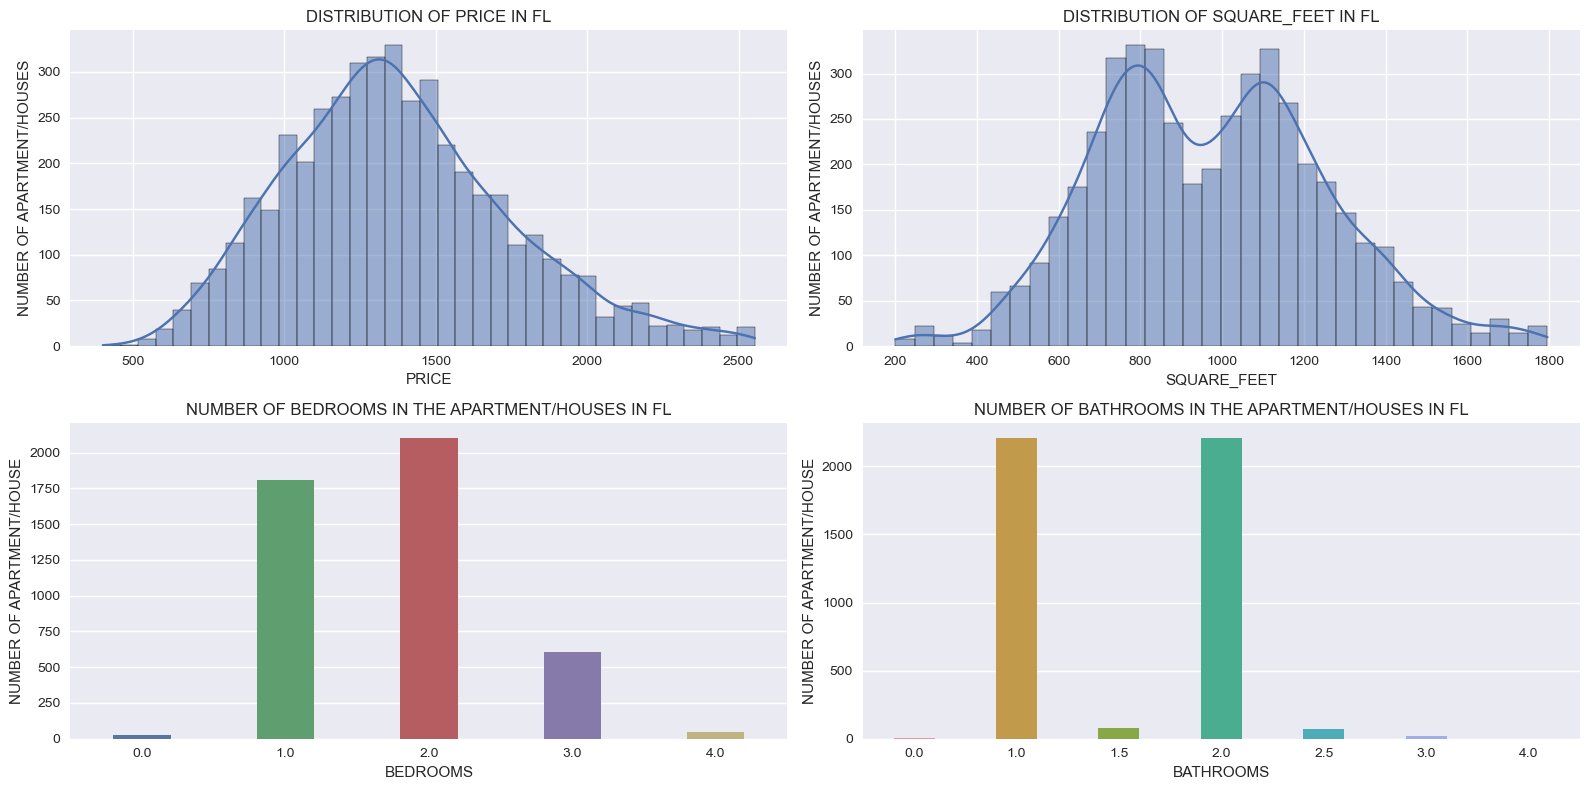

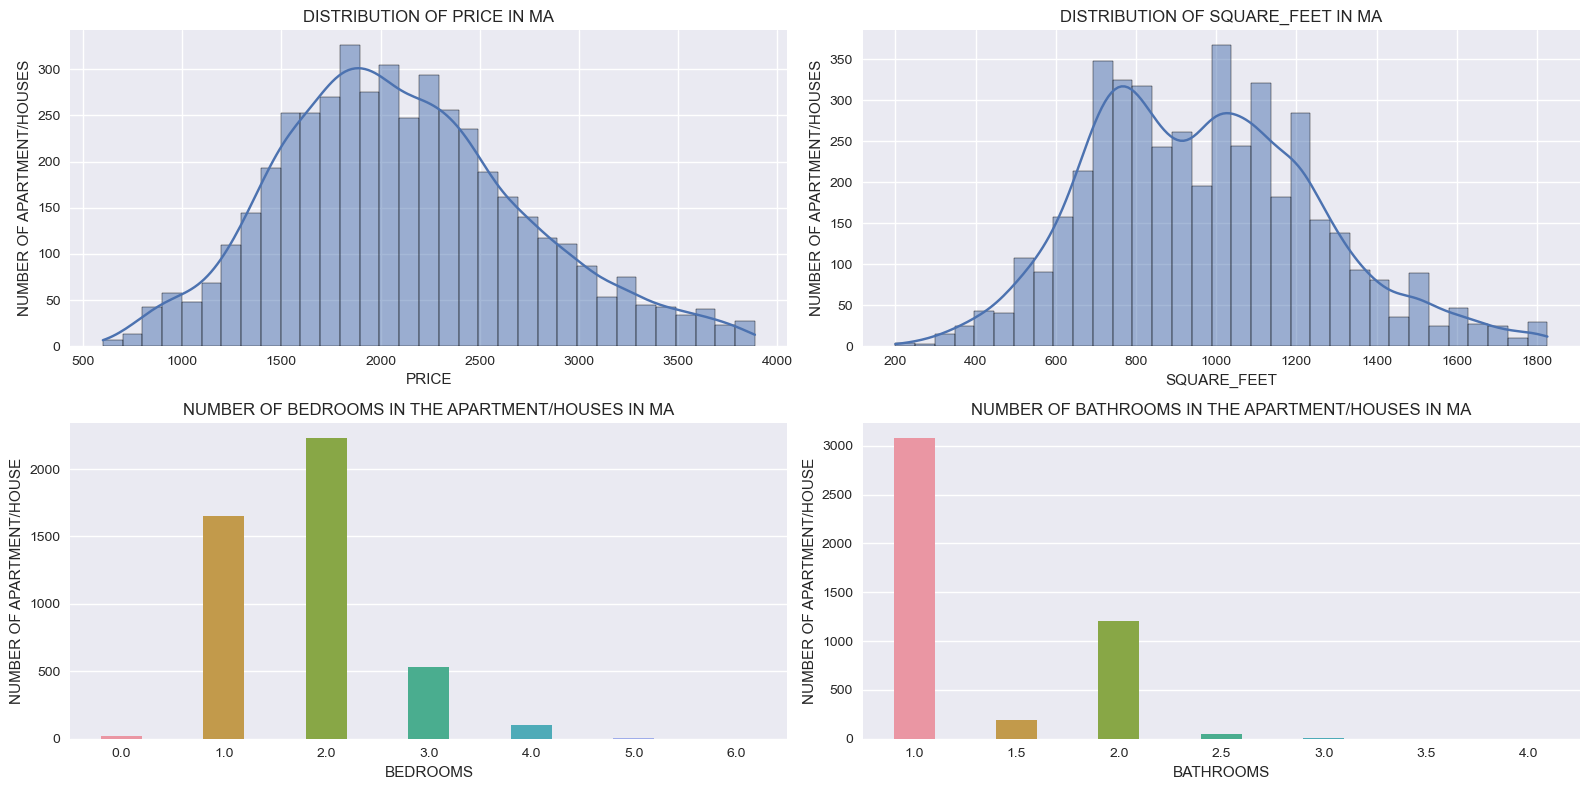

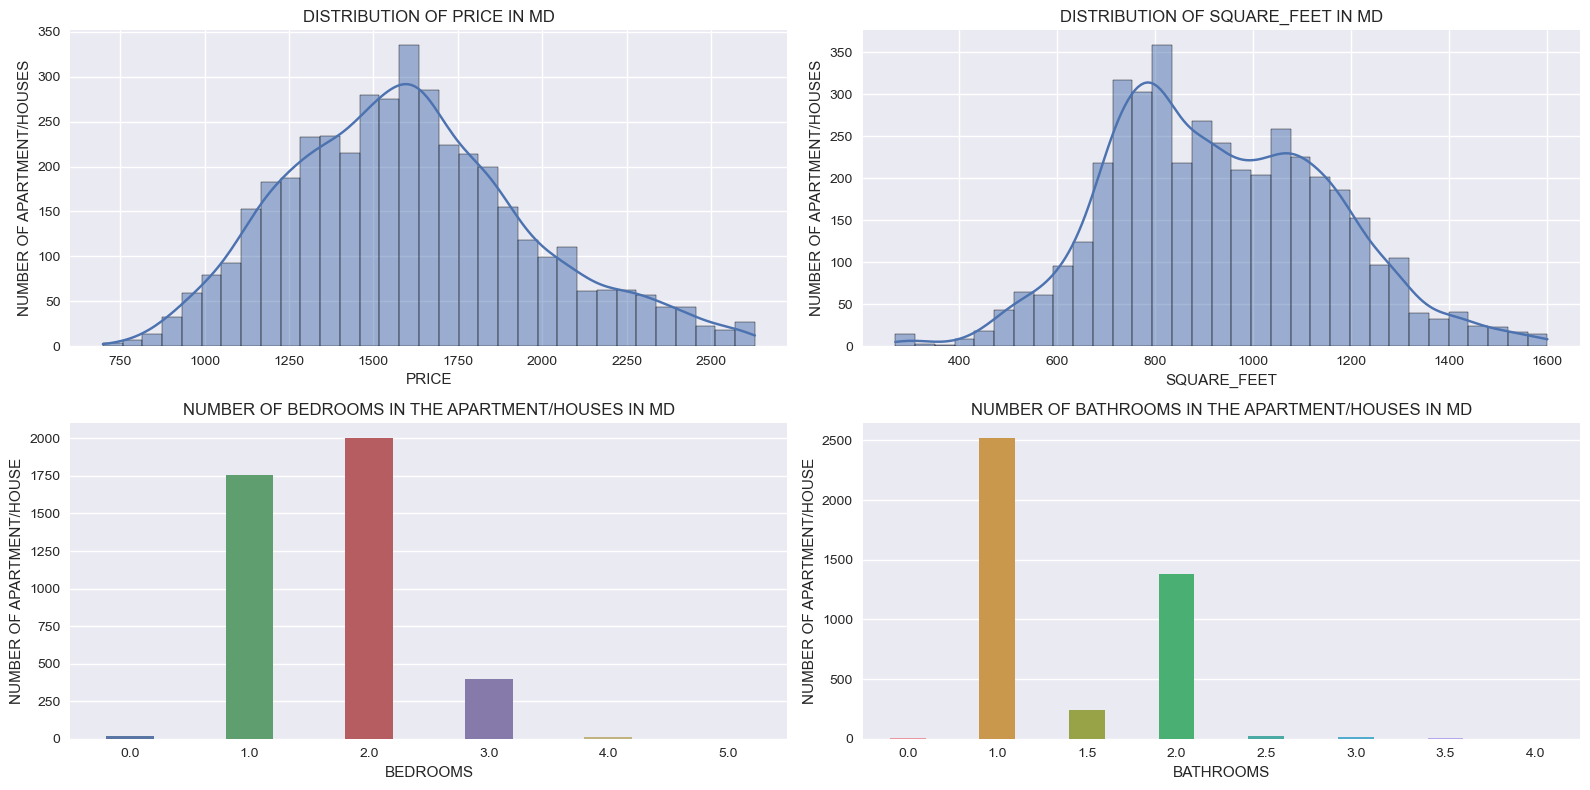

In [26]:
for state, df in df_dict.items():
    fig, ax = plt.subplots(figsize=MULTICOL_FIGSIZE,nrows=2,ncols=2) #create a matplotlib figure 
    for i in range(NUMERICAL_NROWS): #loop through the rows 
        for j in range(NUMERICAL_NCOLS): #loop through the columns 
            if i==0: # if it is the 1st row 
                sns.histplot(df[numerical_cols[i,j]],ax=ax[i,j],kde=True) #plot the distribution of column of ith row and jth column
                ax[i,j].set_title(f'DISTRIBUTION OF {numerical_cols[i,j]} IN {state}') # set the title 
                ax[i,j].set_xlabel(numerical_cols[i,j]) #set the xlabel 
                ax[i,j].set_ylabel('NUMBER OF APARTMENT/HOUSES') #set the ylabel
            if i==1: #if it is the second row 
                sns.countplot(x=df[numerical_cols[i,j]],ax=ax[i,j], width=0.4) #plot the countplot of column of ith row and jth column 
                ax[i,j].set_title(f'NUMBER OF {numerical_cols[i,j]} IN THE APARTMENT/HOUSES IN {state}') #set the title 
                ax[i,j].set_xlabel(numerical_cols[i,j]) #set the xlabel
                ax[i,j].set_ylabel('NUMBER OF APARTMENT/HOUSE') #set the ylabel
    plt.tight_layout() #apply tight layout to prevent overlap of columns  
    if not os.path.exists(NUMERICAL_PLOT_DESTINATION): #check if the path exists 
        os.makedirs(NUMERICAL_PLOT_DESTINATION) #if not then make the path 
    plt.savefig(os.path.join(NUMERICAL_PLOT_DESTINATION, f'{state}.png')) #save the figure at the path 
    plt.show() #show the figure 

# State level distribution

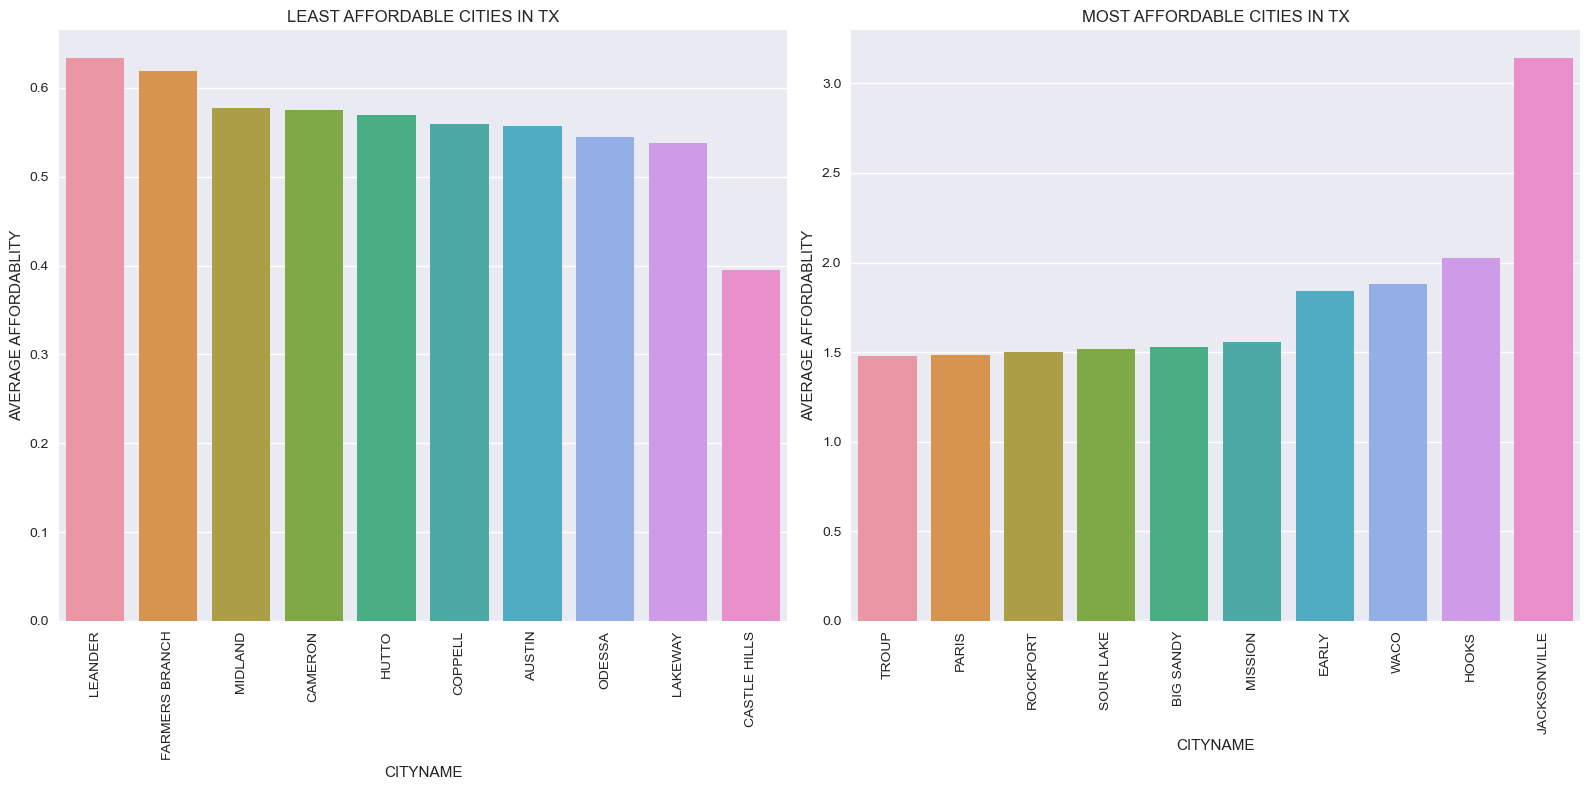

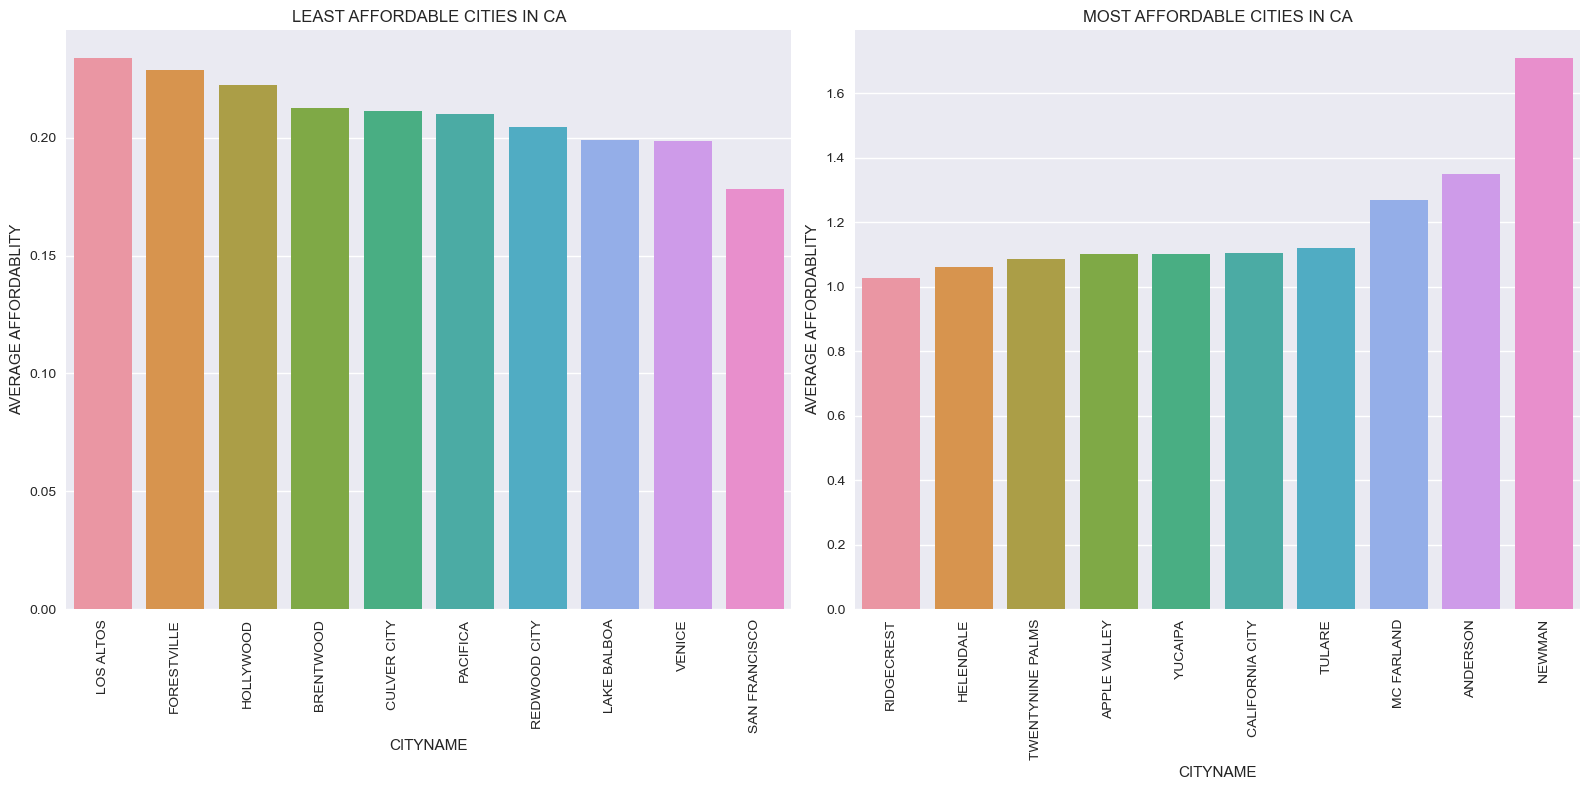

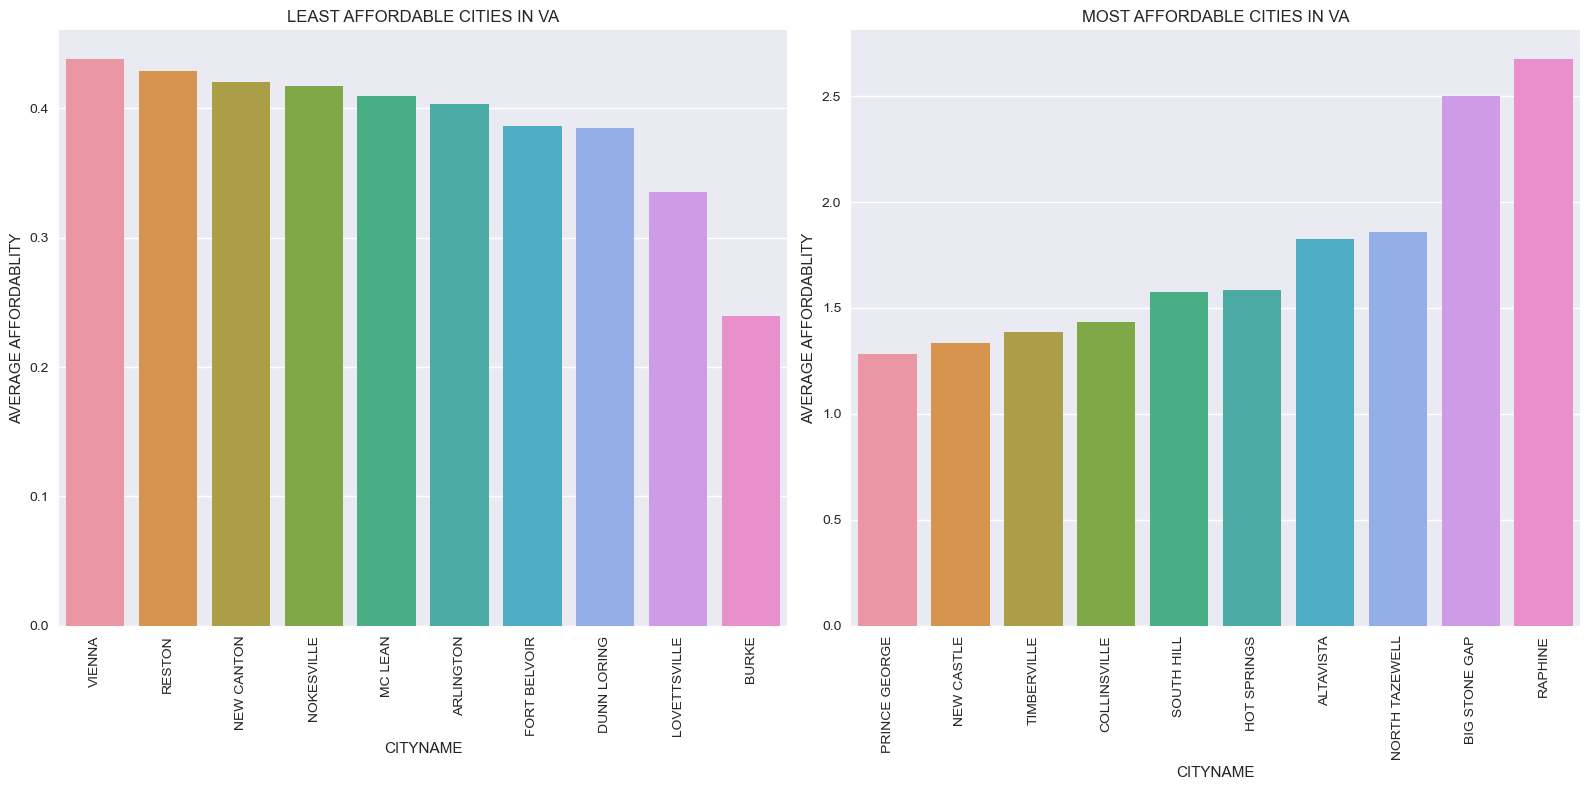

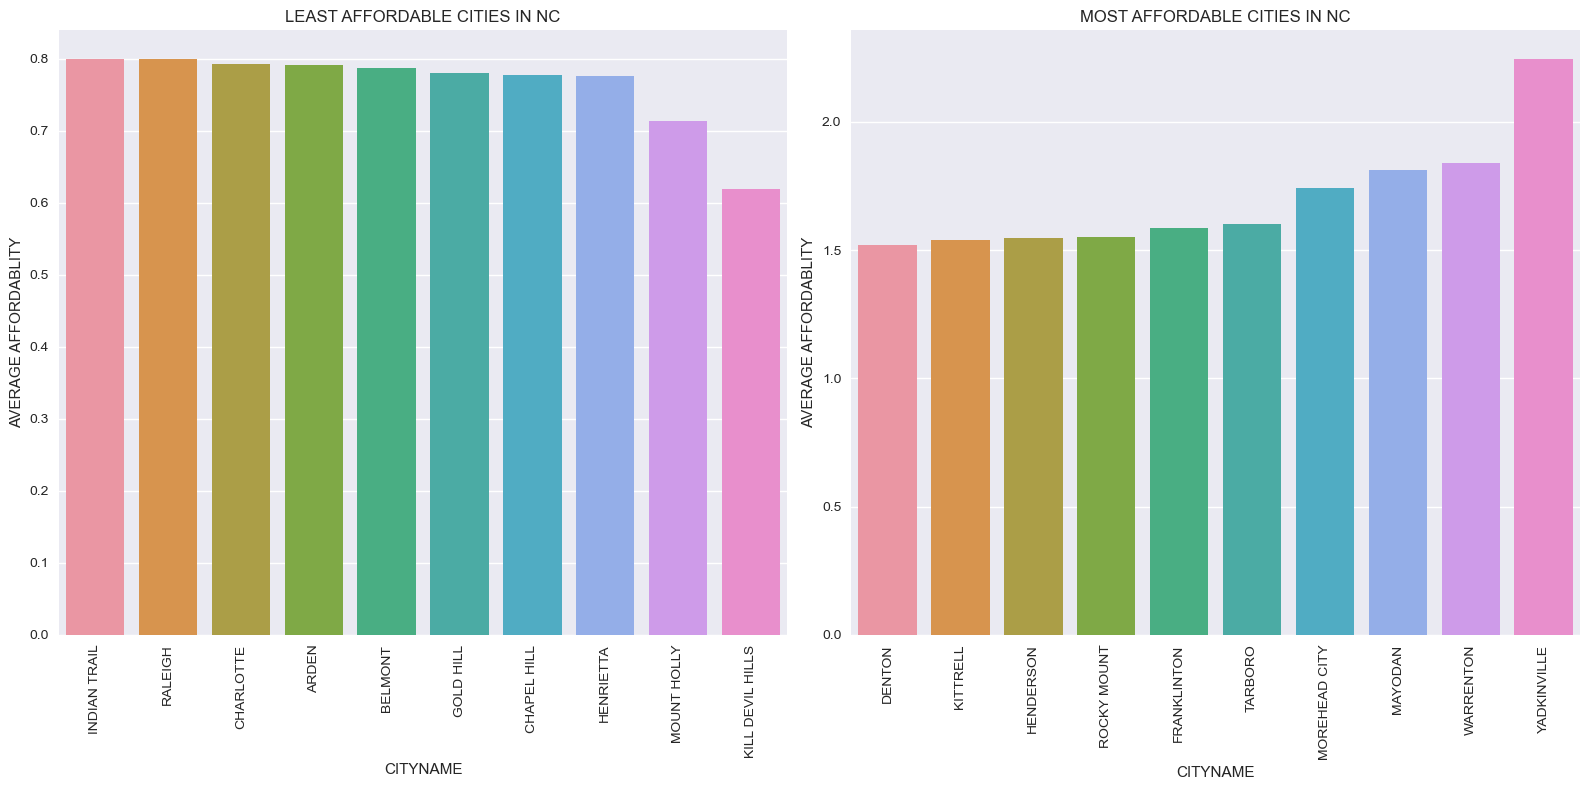

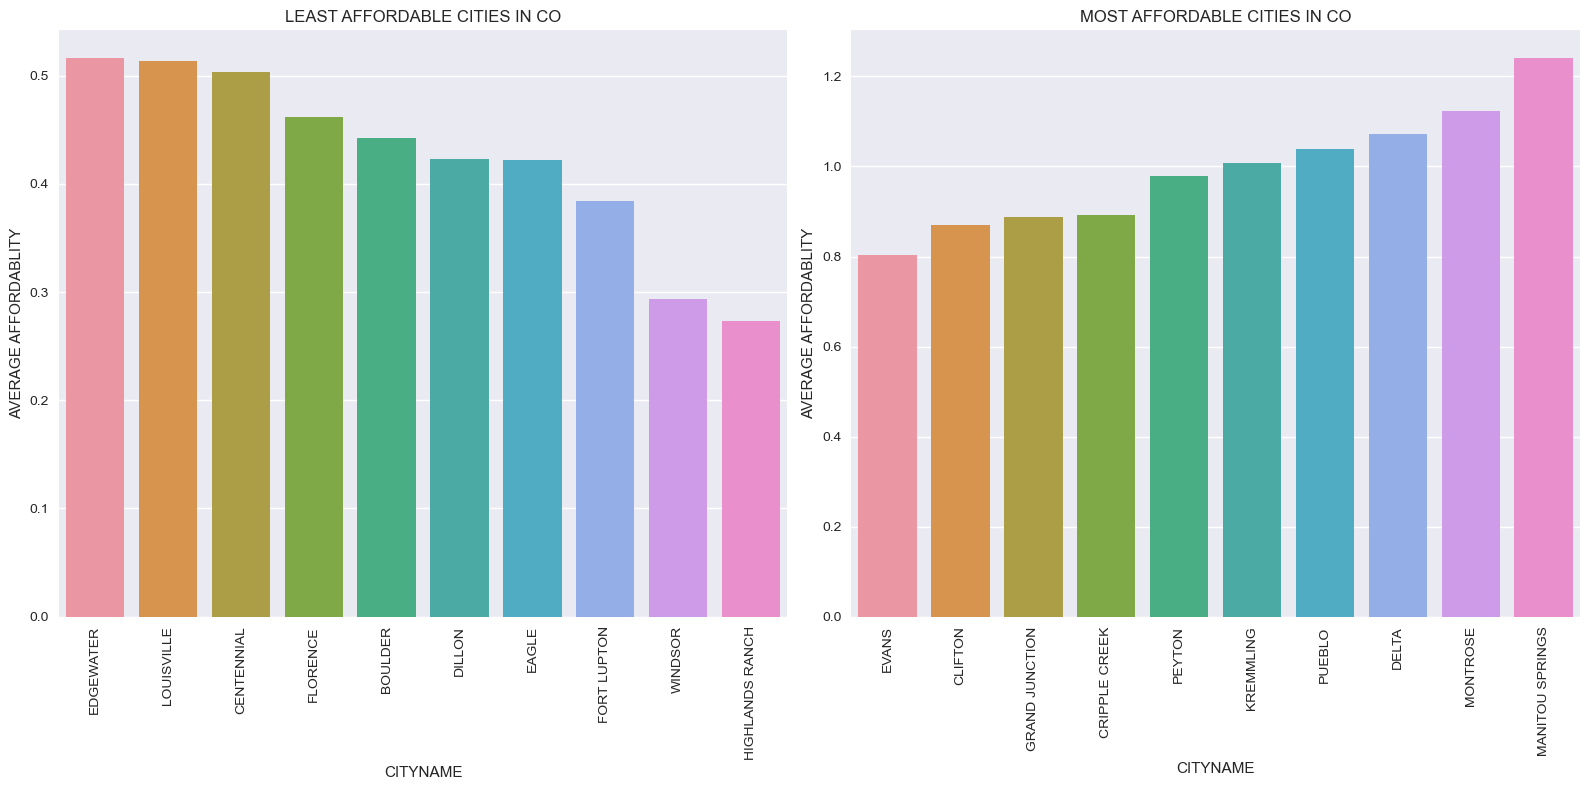

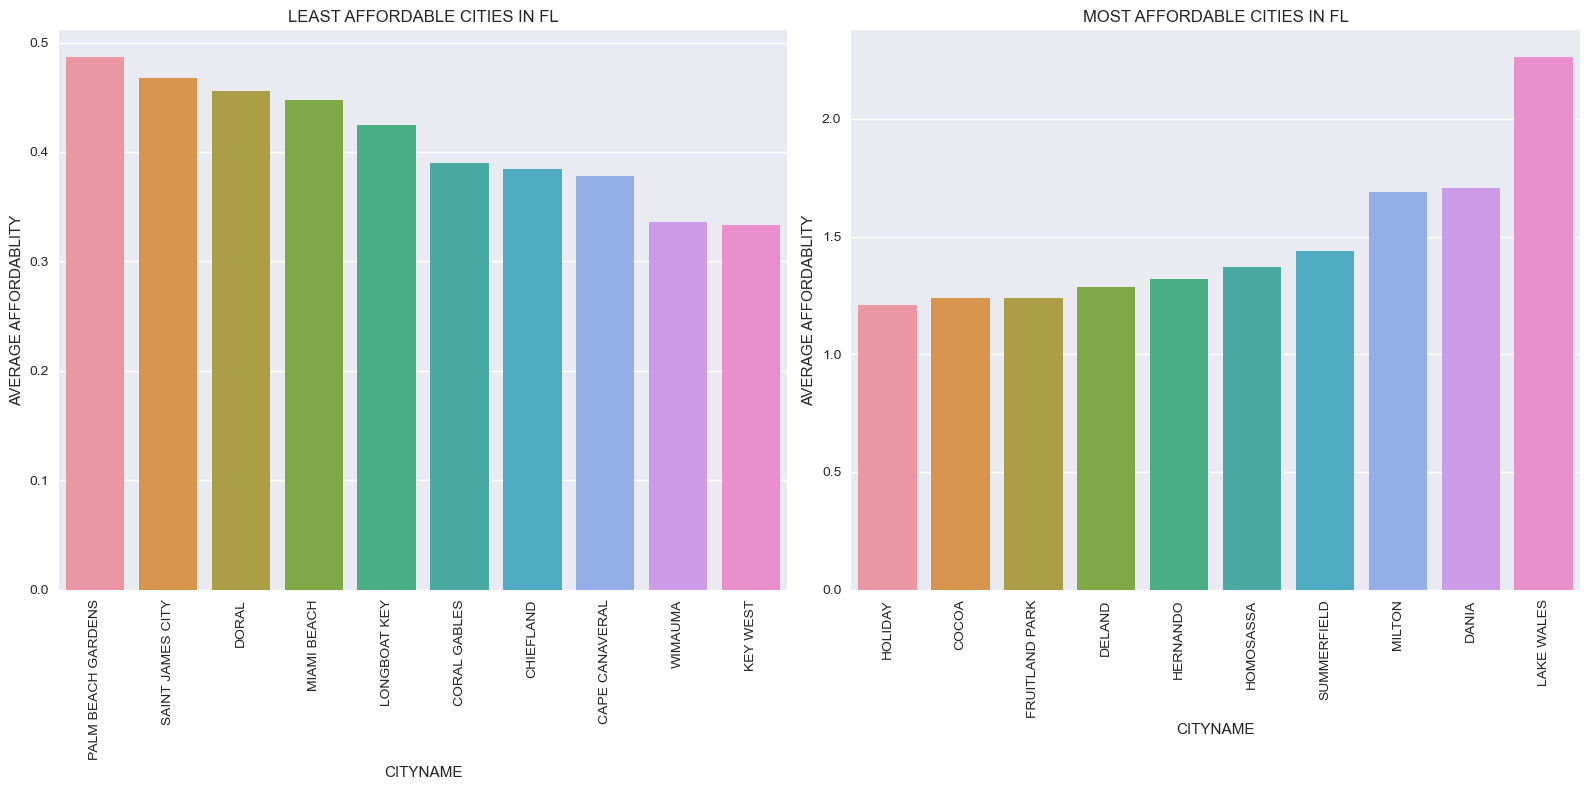

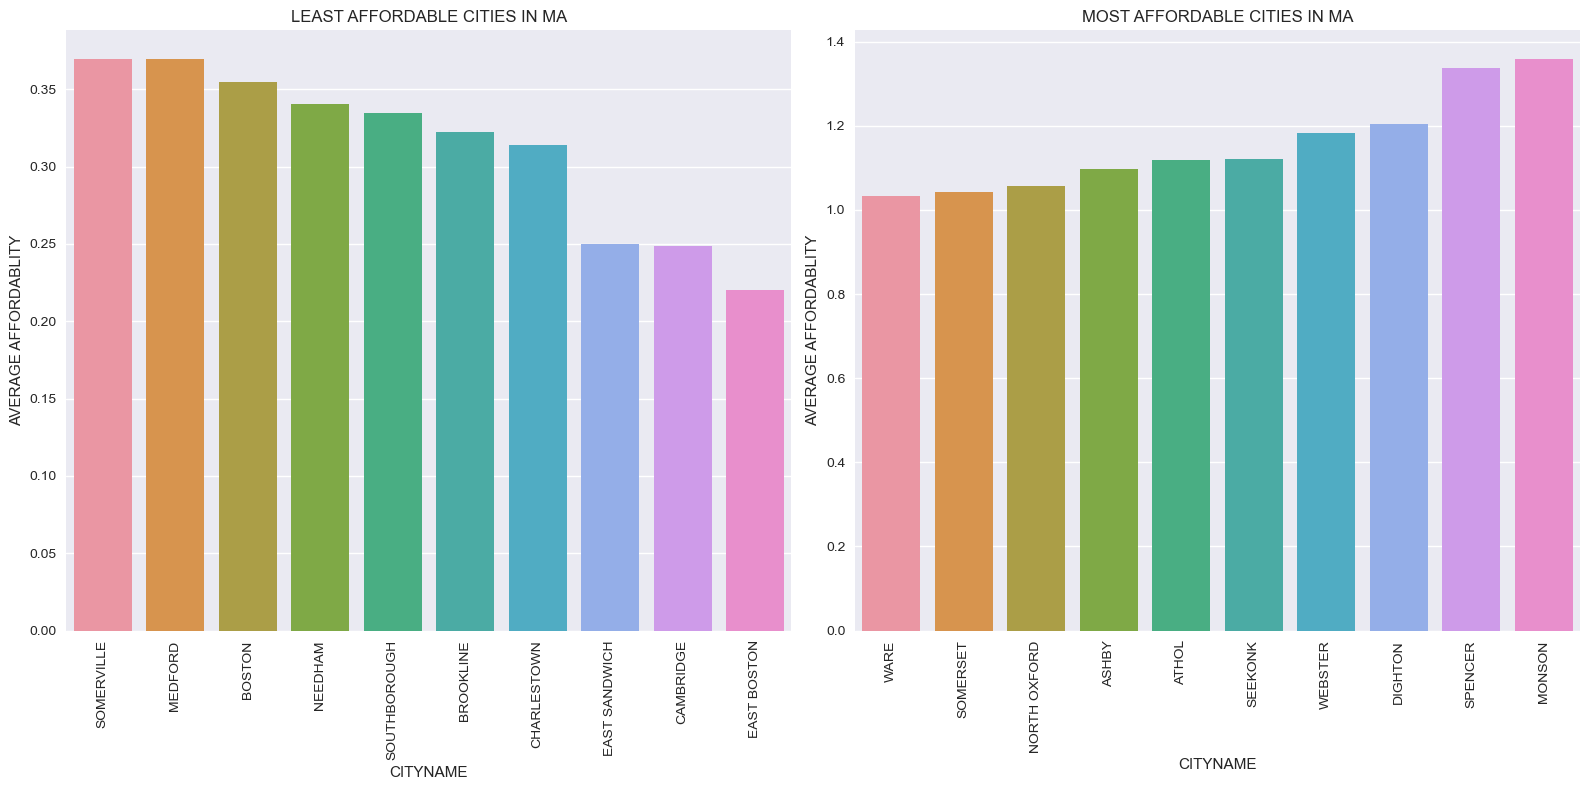

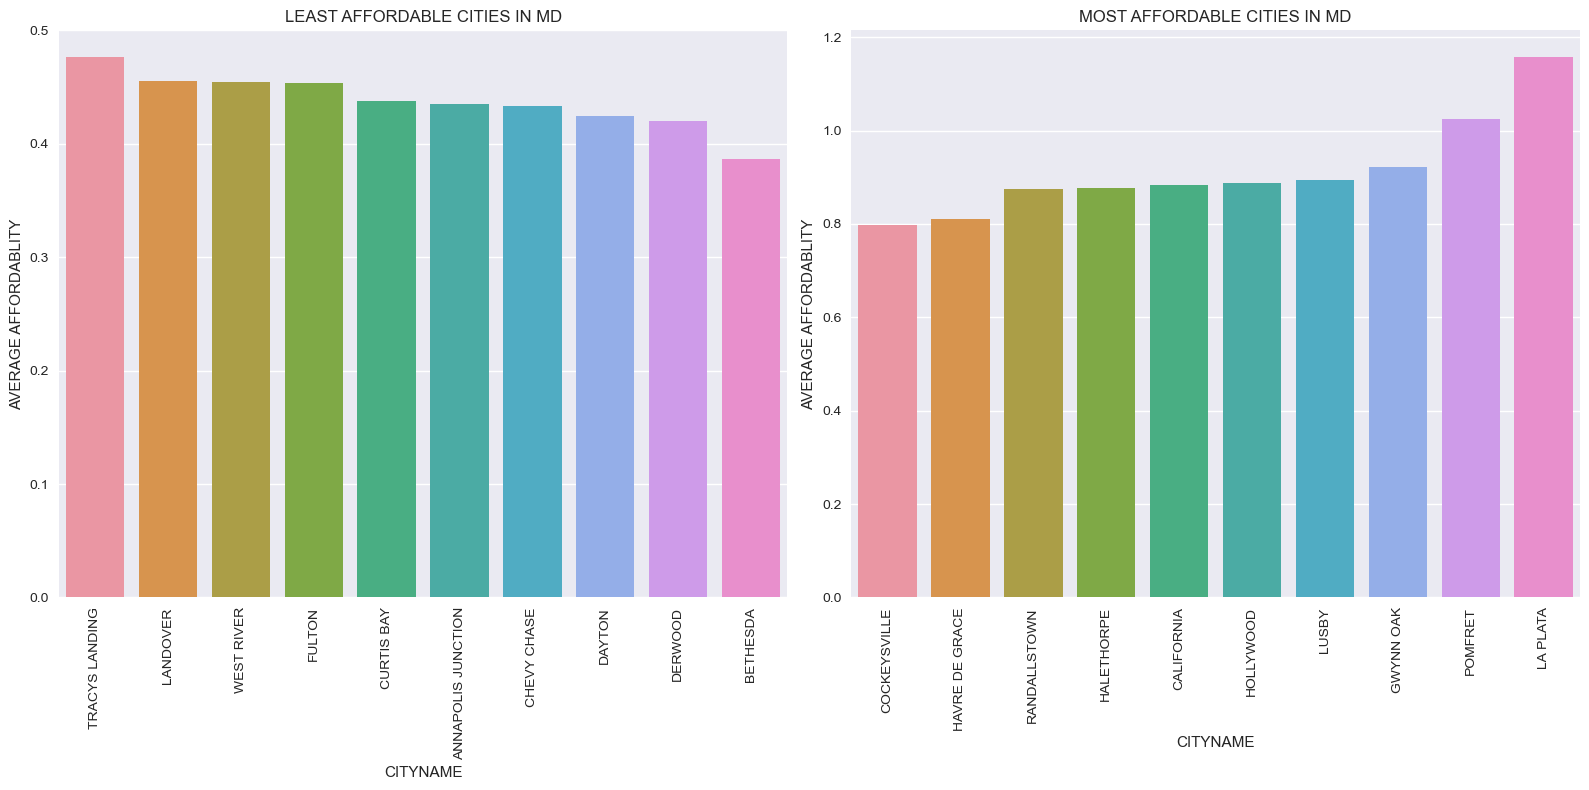

In [27]:
for state, df in df_dict.items(): 
    affordable = df.groupby(by=['CITYNAME'])['AFFORDABILITY'].mean() #calculate mean area for each locality 
    most_affordable = affordable.sort_values(ascending=False)[:10] #sort in ascending order for most spacious 
    least_affordable = affordable.sort_values(ascending=True)[:10] #sort in descending order for least spacious 
    fig, ax = plt.subplots(figsize=MULTICOL_FIGSIZE,nrows=1,ncols=2) #create figure with 1 row and 2 cols 
    sns.barplot(x=least_affordable.index, y=least_affordable, ax=ax[0], order=least_affordable.index[::-1]) #plot least spacious on 1st col 
    ax[0].set_title(f'LEAST AFFORDABLE CITIES IN {state}') #set title 
    ax[0].set_xlabel('CITYNAME') #set xlabel 
    ax[0].set_ylabel('AVERAGE AFFORDABLITY') #set ylabel
    ax[0].tick_params(axis='x',labelrotation=90) #rotate the labels on x axis by 90 degrees for readibility
    sns.barplot(x=most_affordable.index, y=most_affordable,ax=ax[1],order=most_affordable.index[::-1])#plot least affordable localities in 2nd column 
    ax[1].set_title(f'MOST AFFORDABLE CITIES IN {state}') 
    ax[1].set_xlabel('CITYNAME') #set xlabel 
    ax[1].set_ylabel('AVERAGE AFFORDABLITY') #set ylabel
    ax[1].tick_params(axis='x',labelrotation=90) #rotate the labels on x axis by 90 degrees for readibility
    plt.tight_layout() #apply tight layout for no overlap  
    if not os.path.exists(AFFORDABILITY_PLOT_DESTINATION): #check if the path exists
        os.makedirs(AFFORDABILITY_PLOT_DESTINATION) #if not, make the path 
    plt.savefig(os.path.join(AFFORDABILITY_PLOT_DESTINATION, f'{state}.png')) #save the figure 
    plt.show() #show the figure 



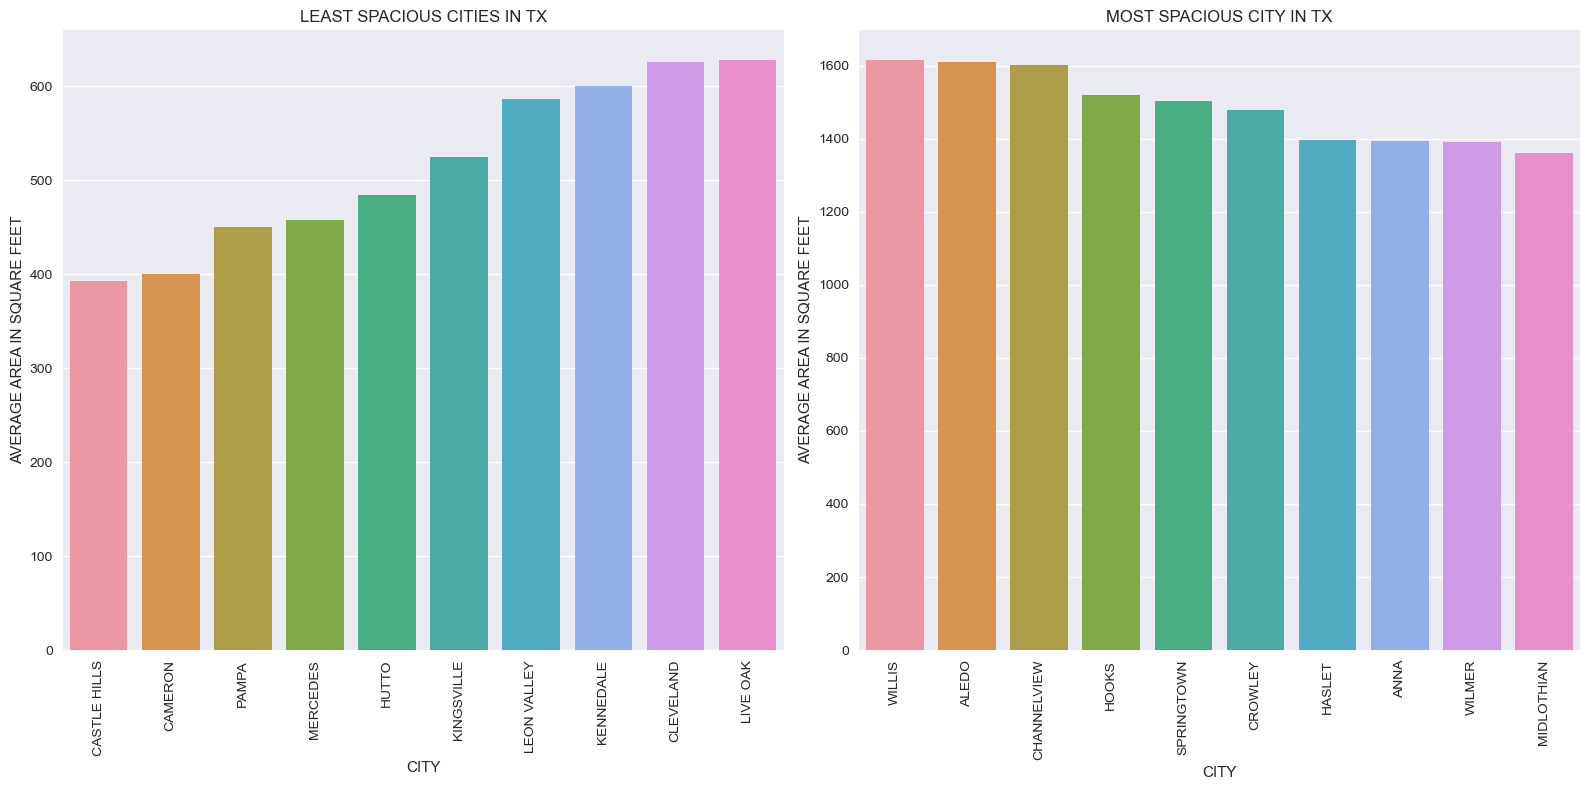

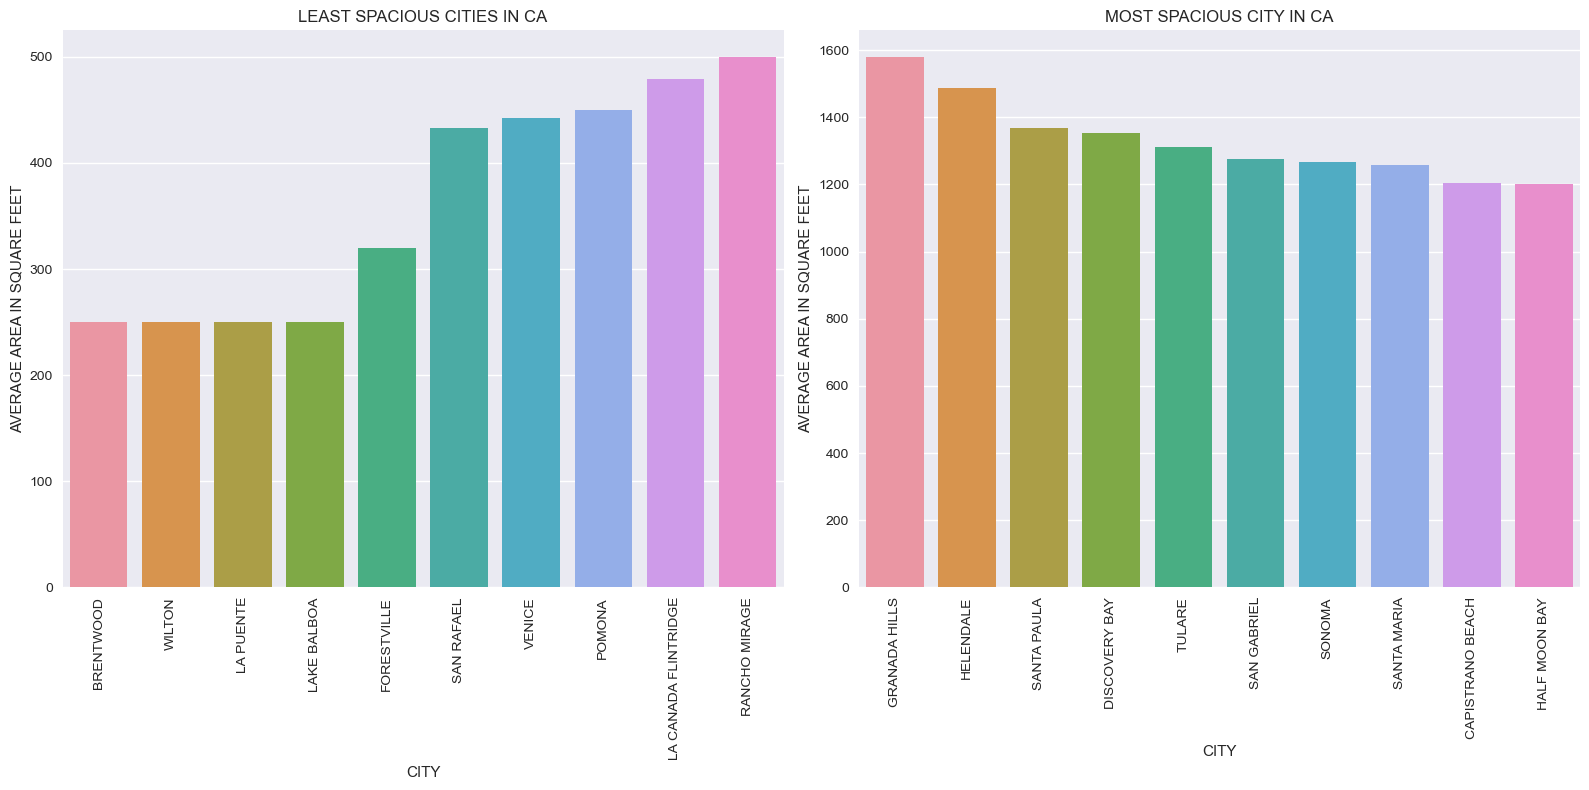

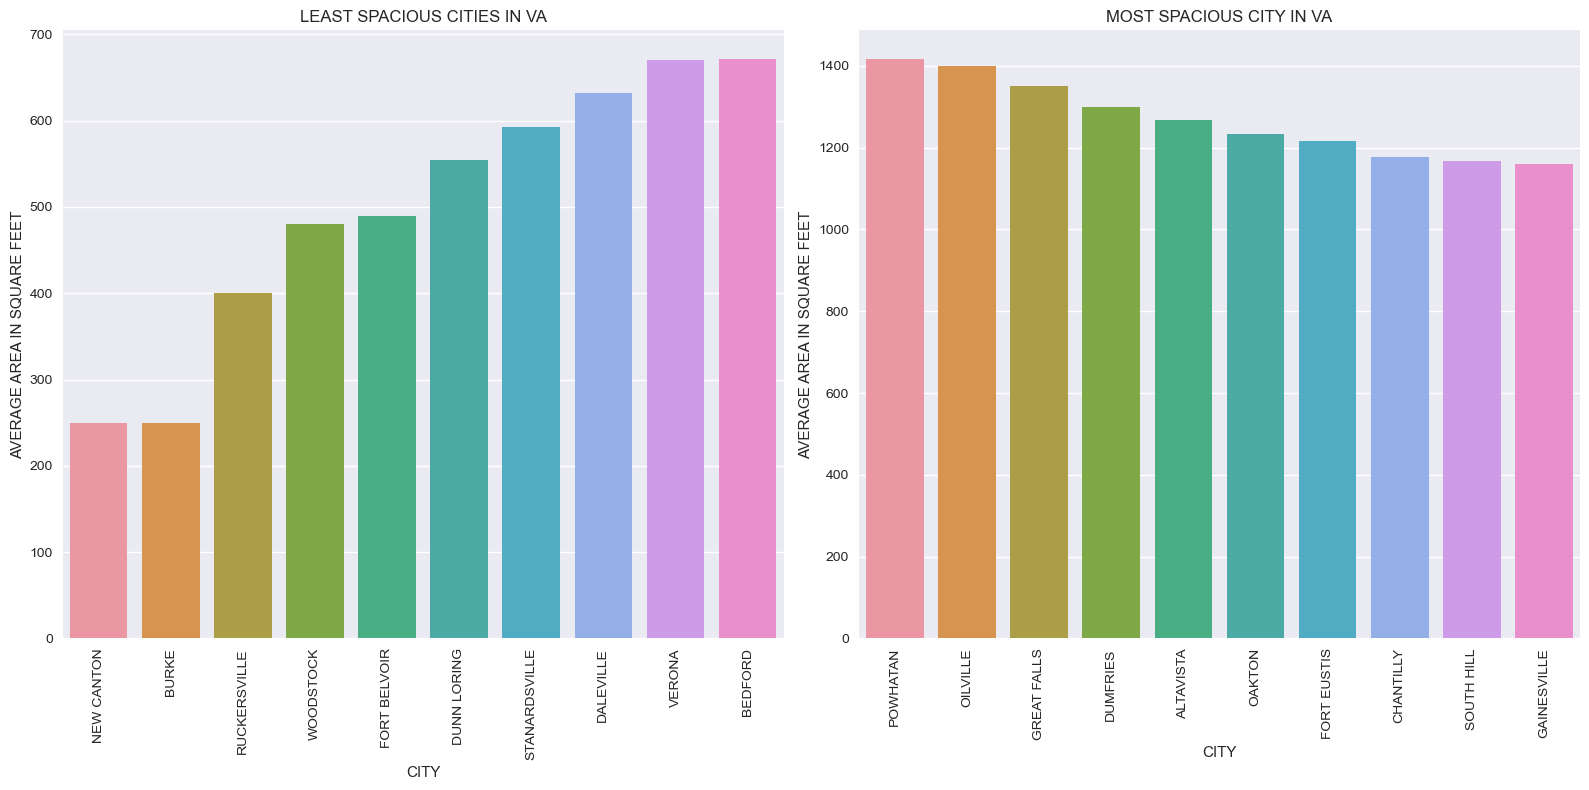

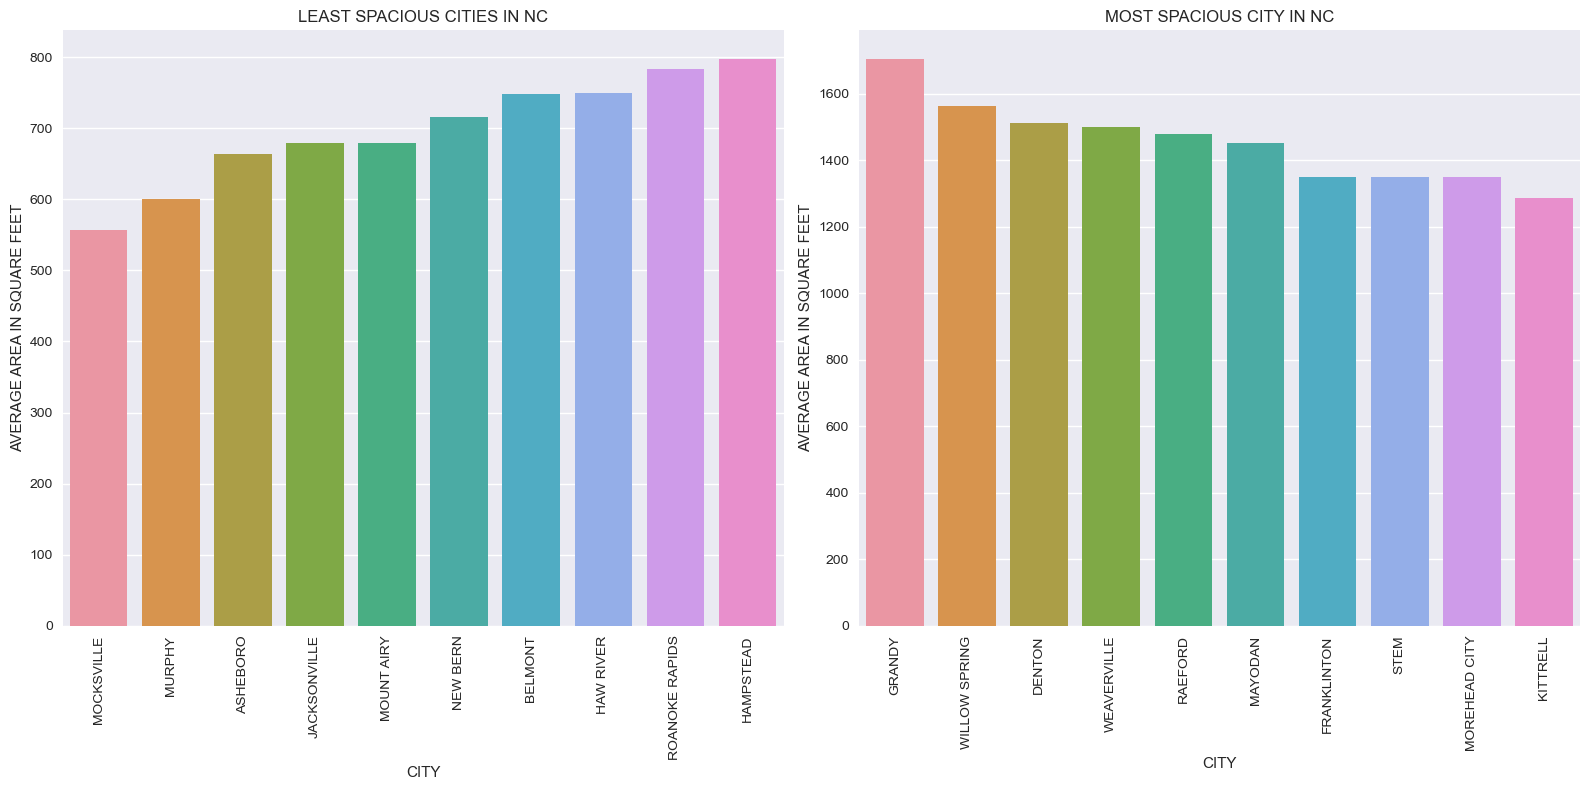

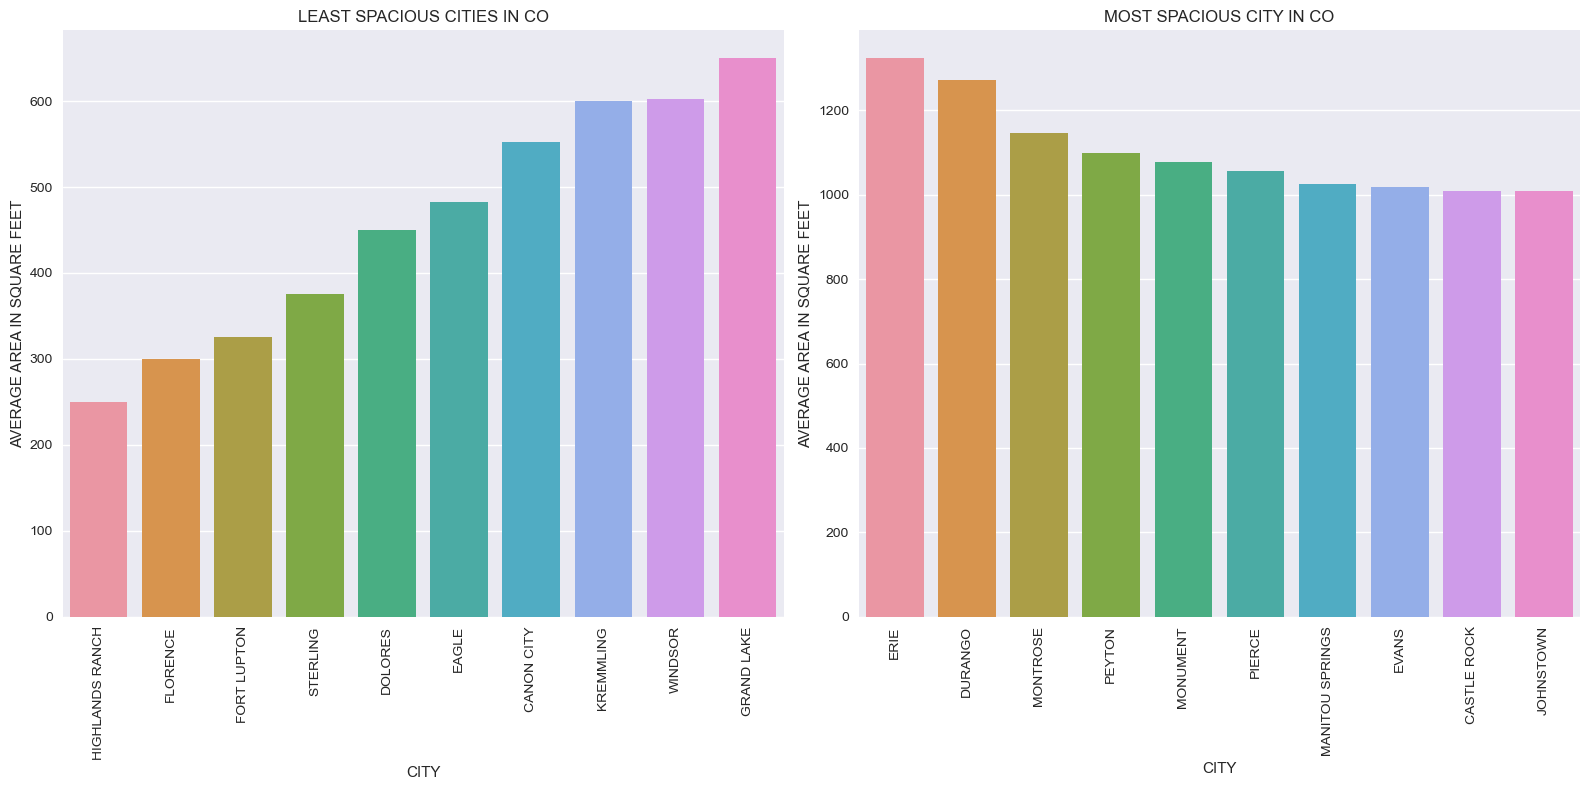

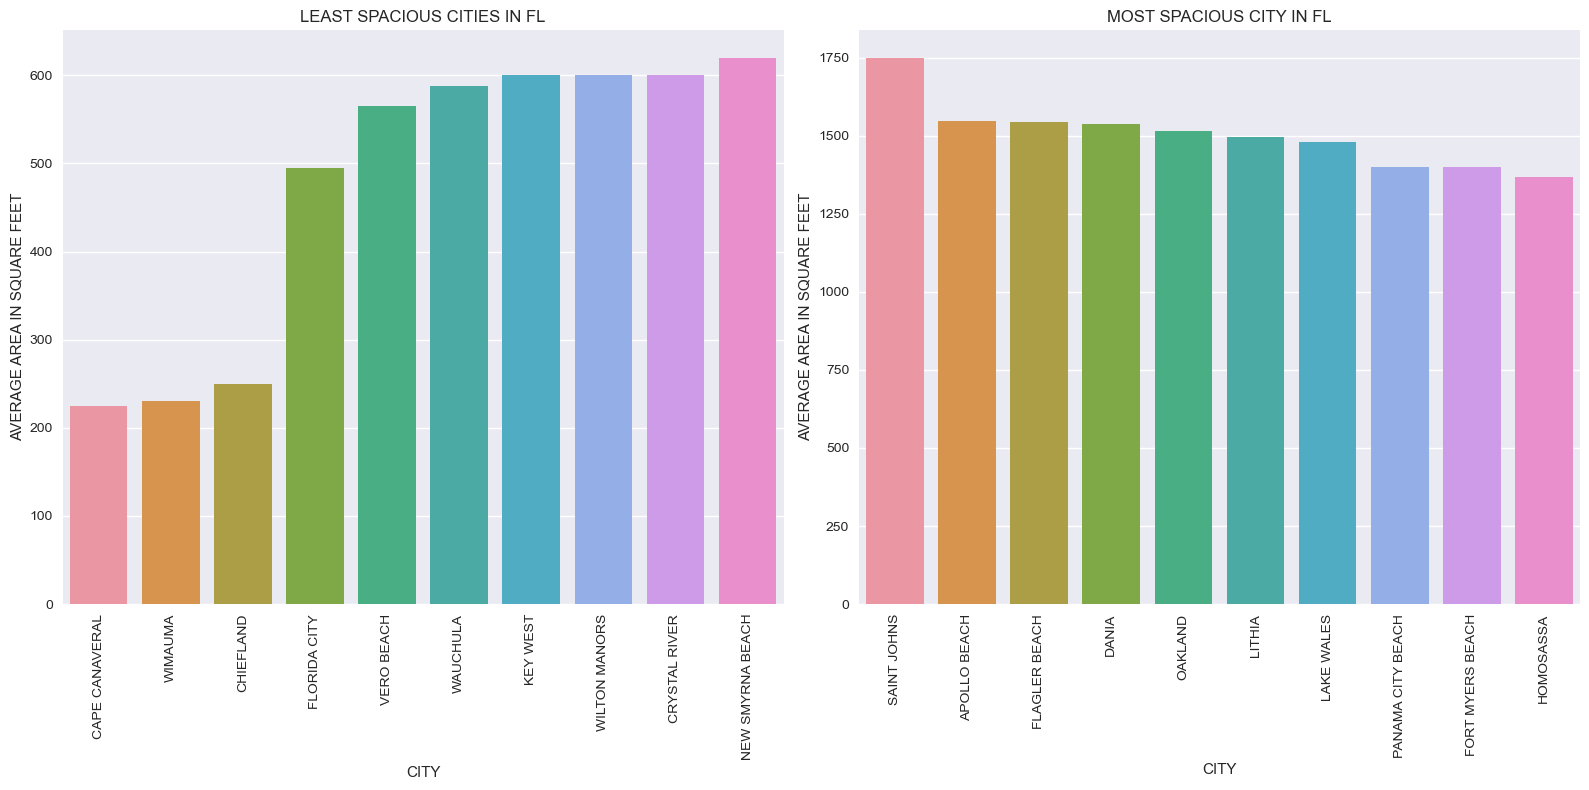

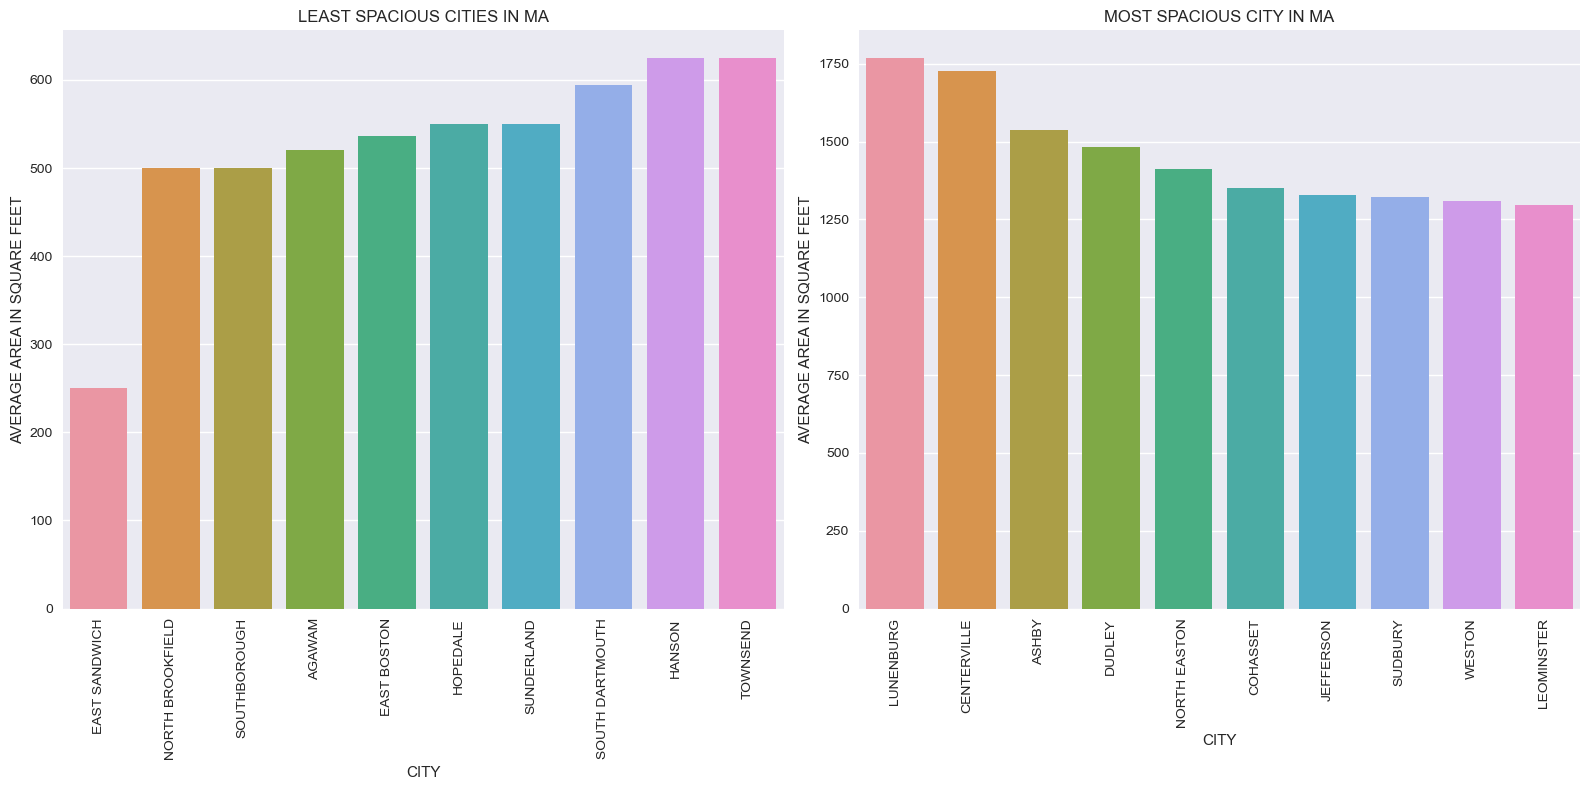

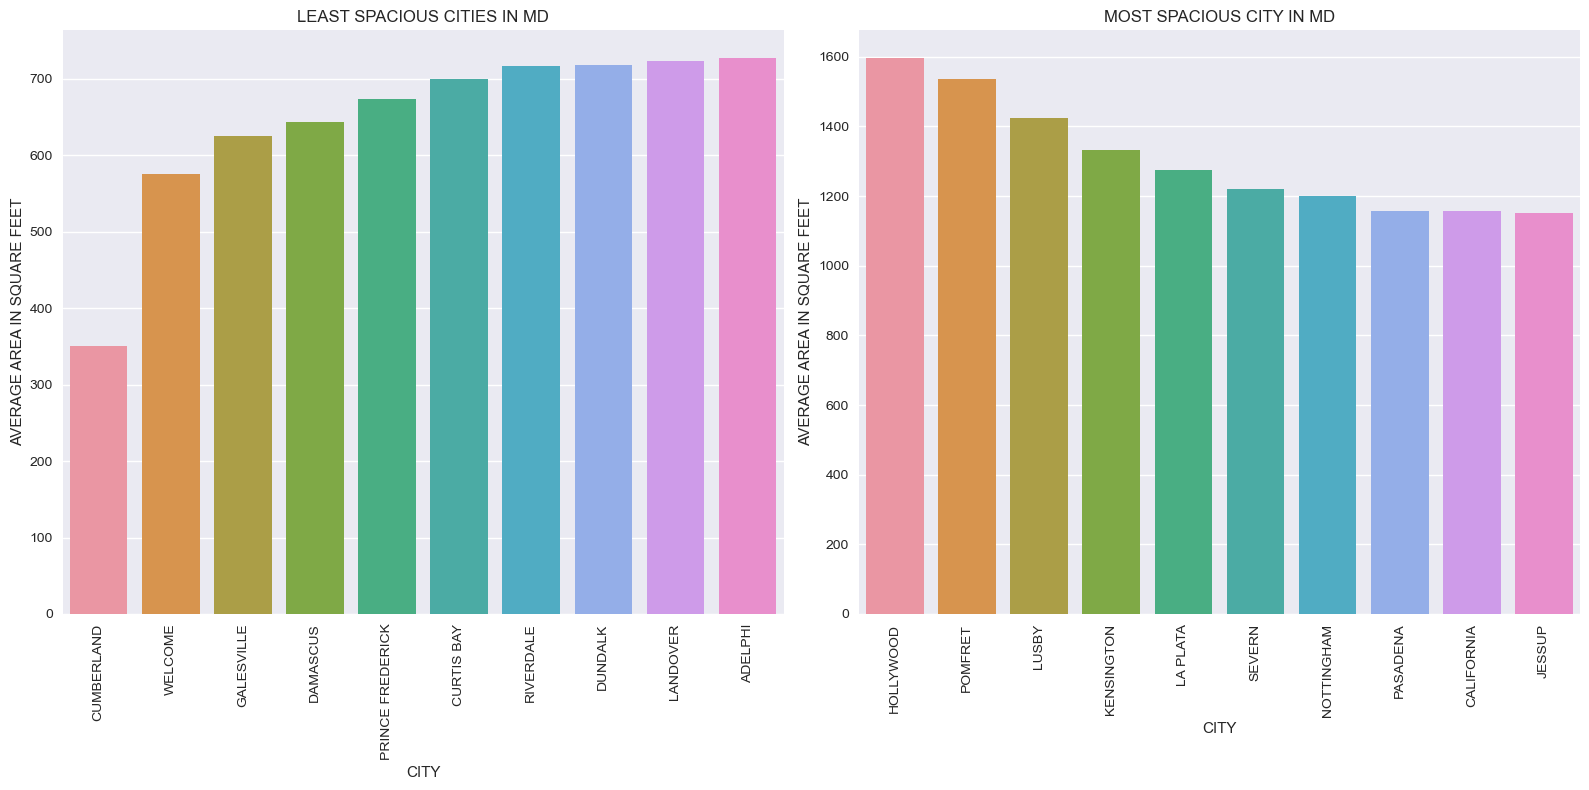

In [28]:
for state, df in df_dict.items():
    spacious = df.groupby(by=['CITYNAME'])['SQUARE_FEET'].mean() #calculate mean area for each locality 
    most_spacious = spacious.sort_values(ascending=False)[:10] #sort in ascending order for most spacious 
    least_spacious = spacious.sort_values(ascending=True)[:10] #sort in descending order for least spacious 
    fig, ax = plt.subplots(figsize=MULTICOL_FIGSIZE,nrows=1,ncols=2) #create figure with 1 row and 2 cols 
    sns.barplot(x=least_spacious.index, y=least_spacious, ax=ax[0]) #plot least spacious on 1st col 
    ax[0].set_title(f'LEAST SPACIOUS CITIES IN {state}') #set title 
    ax[0].set_xlabel('CITY') #set xlabel 
    ax[0].set_ylabel('AVERAGE AREA IN SQUARE FEET') #set ylabel
    ax[0].tick_params(axis='x',labelrotation=90) #rotate the labels on x axis by 90 degrees for readibility
    sns.barplot(x=most_spacious.index, y=most_spacious,ax=ax[1])#plot least affordable localities in 2nd column 
    ax[1].set_title(f'MOST SPACIOUS CITY IN {state}') 
    ax[1].set_xlabel('CITY') #set xlabel 
    ax[1].set_ylabel('AVERAGE AREA IN SQUARE FEET') #set ylabel
    ax[1].tick_params(axis='x',labelrotation=90) #rotate the labels on x axis by 90 degrees for readibility
    plt.tight_layout() #apply tight layout for no overlap 
    if not os.path.exists(SPACIOUS_PLOT_DESTINATION): #check if path exists
        os.makedirs(SPACIOUS_PLOT_DESTINATION) #if not then create the path 
    plt.savefig(os.path.join(SPACIOUS_PLOT_DESTINATION, f'{state}.png')) #save the figure 
    plt.show() #show the plot 

